In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
zamato = pd.read_csv(r"D:\New folder (3)\New folder (3)\zomato.csv", encoding='latin1')


In [4]:
country = pd.read_excel(r"D:\New folder (3)\New folder (3)\Country-Code.xlsx")

In [5]:
food = pd.merge(zamato, country, on='Country Code', how='inner')

In [67]:
food

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  ...  Has Table booking  \
0     14.565443        French, Japanese, Desserts  ...                Yes   
1     14.553708                          Japanese  ...                Yes   
2     14.581404  Seafood, Asian, Filipino, Indian  ...                Yes   
3     14.585318                   Japanese, Sushi  ...                 No   
4     14.584450                  Japanese, Korean  ...                Yes   
...         ...                               ...  ...                ...   
9546  41.022793                           Turkish  ...                 No   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...                 No   
9548  41.055817            Italian, World Cuisine  ...                 No   
9549  41.057979                   Restaurant Cafe  ...                 No   

# Null Values 

In [7]:
food.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [8]:
food.isin(['?','-',' ']).sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

# skewness 

In [9]:
food.skew()

C:\Users\ravin\AppData\Local\Temp\ipykernel_24068\1783687783.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  food.skew()


Restaurant ID            0.061570
Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

# kurtosis

In [10]:
food.kurtosis()

C:\Users\ravin\AppData\Local\Temp\ipykernel_24068\1451011499.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  food.kurtosis()


Restaurant ID             -1.950996
Country Code               7.392578
Longitude                  8.216586
Latitude                  12.530803
Average Cost for two    1495.777394
Price range               -0.142550
Aggregate rating          -0.582217
Votes                    128.225969
dtype: float64

# Data Presentation

# # No  of Restaurant countrywise

Axes(0.125,0.11;0.775x0.77)


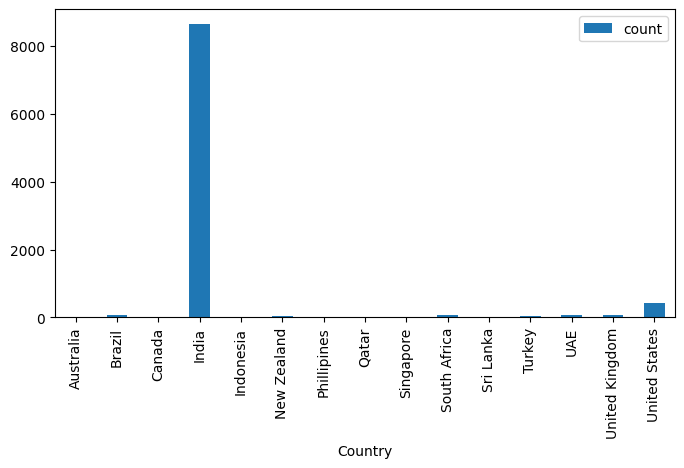

In [11]:
aggregated = food.groupby('Country')['Restaurant Name'].agg(['count']).plot(kind='bar', figsize=(8,4))
print(aggregated)

# #  number of Restaurant citywise

<Axes: >

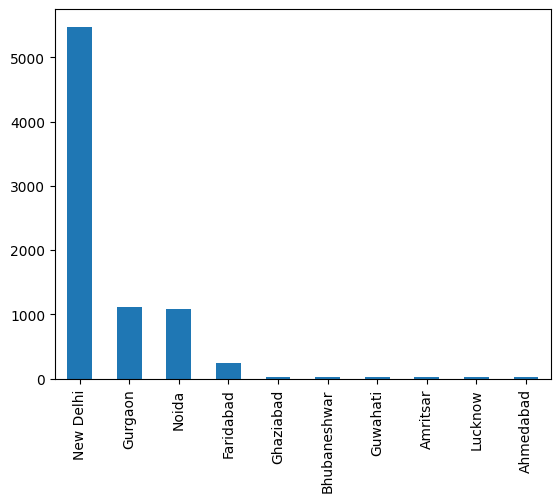

In [12]:
food['City'].value_counts().head(10).plot(kind='bar')

# # Rating of Restaurant

<Axes: >

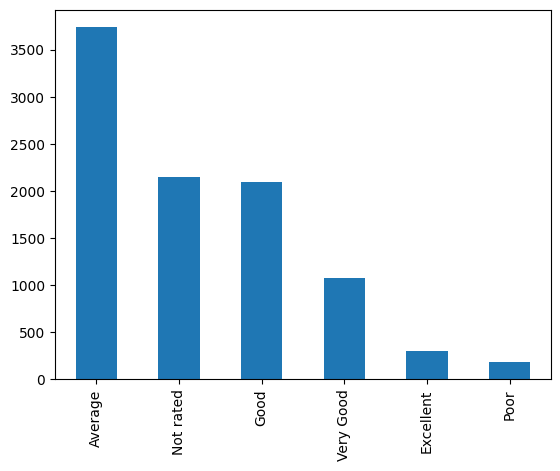

In [13]:
food['Rating text'].value_counts().plot(kind='bar')

In [14]:
food['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

# Rating Text

<Axes: ylabel='Rating text'>

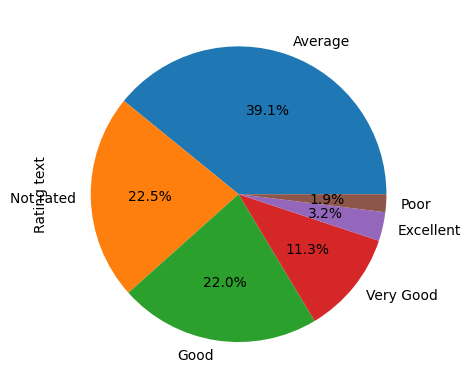

In [15]:
food['Rating text'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# # Maximum number of Restaurant

<Axes: >

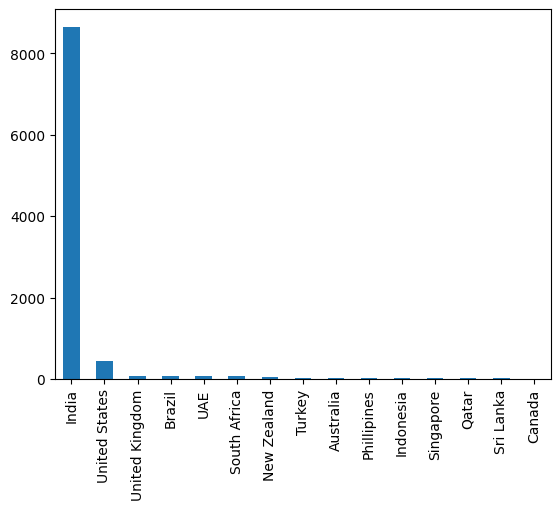

In [16]:
food['Country'].value_counts().head(60).plot(kind='bar')

In [17]:
food['Country'].value_counts().head(60)

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

# # Highest Rating Restaurant

In [18]:
highest_rating = food[food['Aggregate rating'] >= 4.9]


<Axes: >

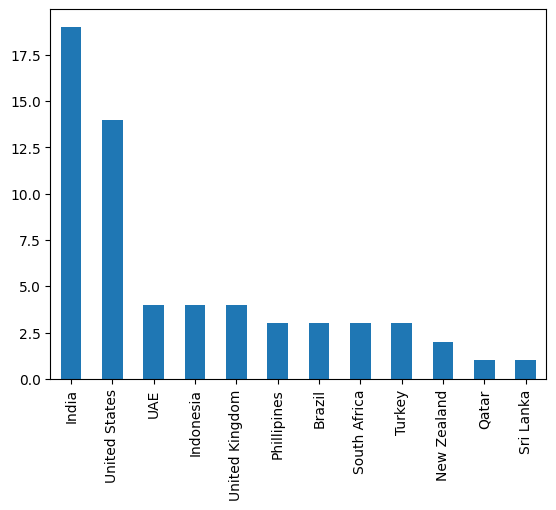

In [19]:
highest_rating['Country'].value_counts().plot(kind='bar')

# Price range vs Rating text

<Axes: xlabel='Price range'>

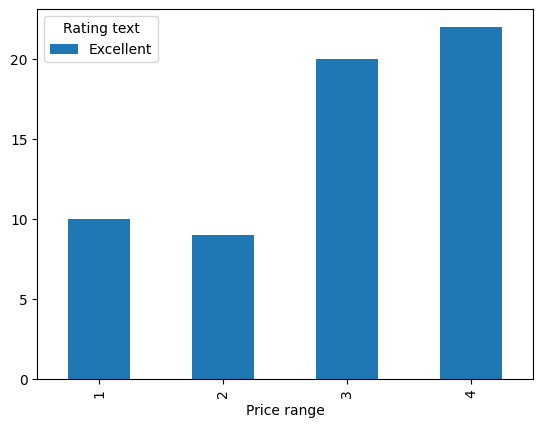

In [20]:
pd.crosstab(highest_rating['Price range'], highest_rating['Rating text']).plot(kind='bar')

# Lowest Rating Restaurant

In [21]:
lowest_rating = food[food['Aggregate rating'] == 0.0]
lowest_rating['Country'].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [22]:
lowest_rating['Rating color'].value_counts()

White    2148
Name: Rating color, dtype: int64

<Axes: >

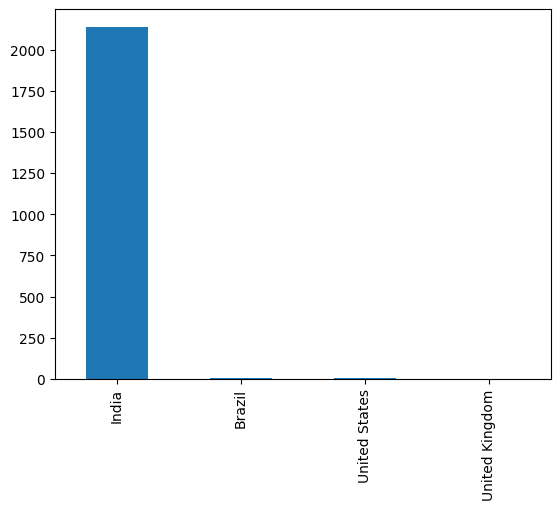

In [23]:
lowest_rating['Country'].value_counts().plot(kind='bar')

# Rating color

In [24]:
pd.crosstab(food['Rating color'], food['Aggregate rating'])

Aggregate rating   0.0  1.8  1.9  2.0  2.1  2.2  2.3  2.4  2.5  2.6  ...  4.0  \
Rating color                                                         ...        
Dark Green           0    0    0    0    0    0    0    0    0    0  ...    0   
Green                0    0    0    0    0    0    0    0    0    0  ...  266   
Orange               0    0    0    0    0    0    0    0  110  191  ...    0   
Red                  0    1    2    7   15   27   47   87    0    0  ...    0   
White             2148    0    0    0    0    0    0    0    0    0  ...    0   
Yellow               0    0    0    0    0    0    0    0    0    0  ...    0   

Aggregate rating  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  
Rating color                                                   
Dark Green          0    0    0    0   95   78   42   25   61  
Green             274  221  174  144    0    0    0    0    0  
Orange              0    0    0    0    0    0    0    0    0  
Red                 0    0    0    0    0    0    0    0    0  
White               0    0    0    0    0    0    0    0    0  
Yellow              0    0    0    0    0    0    0    0    0  

[6 rows x 33 columns]

# Orange

In [25]:
Orange = food[food['Rating color']=='Orange']

<Axes: >

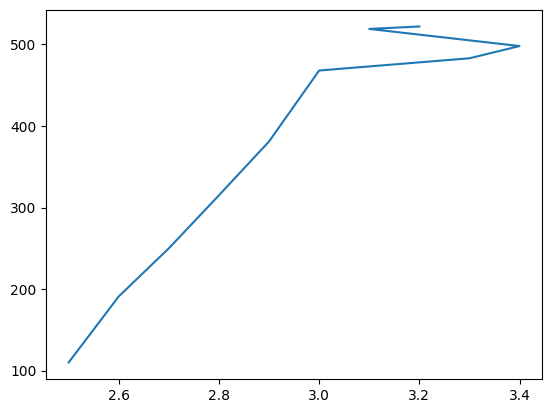

In [26]:
Orange['Aggregate rating'].value_counts().plot()

# Green

<Axes: >

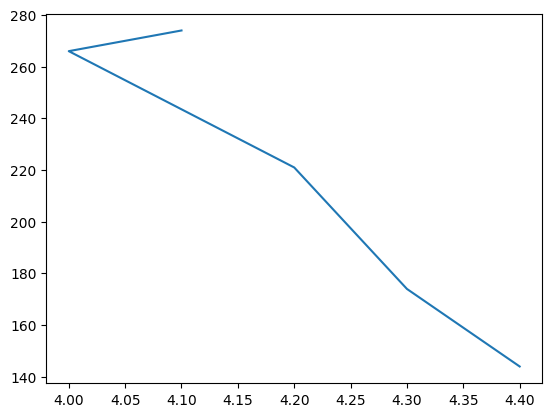

In [27]:
Green = food[food['Rating color']=='Green']
Green['Aggregate rating'].value_counts().plot()

# White

<Axes: ylabel='Frequency'>

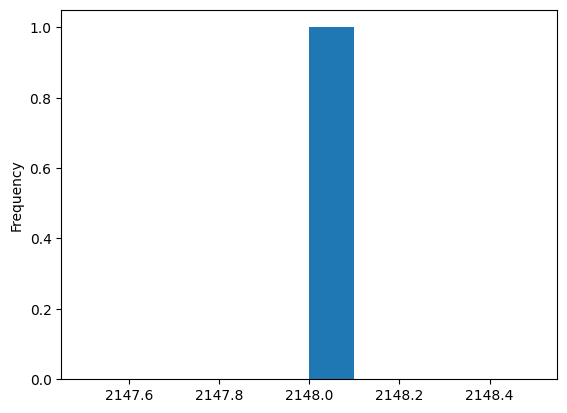

In [28]:
White = food[food['Rating color']=='White']
White['Aggregate rating'].value_counts().plot(kind='hist')

# Yellow

<Axes: >

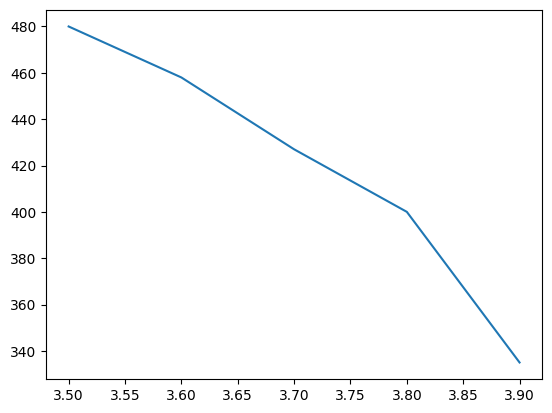

In [29]:
Yellow = food[food['Rating color']=='Yellow']
Yellow['Aggregate rating'].value_counts().plot()

# as you can see above-:

# Dark_Green - 4.5 and above
# Green -      4.0 to 4.4
# Yellow -     3.5 to 3.9
# Orange -     2.5 to 3.4
# Red -        1.8 to 2.4
# white -      0

# imputation

In [85]:
from sklearn.impute import KNNImputer

In [92]:
food['Longitude'] = food['Longitude'].replace(0.00, np.nan)

In [93]:
food['Latitude'] = food['Latitude'].replace(0.00, np.nan)

In [94]:
food.isnull().sum()

Restaurant ID             0
Restaurant Name           0
Country Code              0
City                      0
Address                   0
Locality                  0
Locality Verbose          0
Longitude               498
Latitude                498
Cuisines                  9
Average Cost for two      0
Currency                  0
Has Table booking         0
Has Online delivery       0
Is delivering now         0
Switch to order menu      0
Price range               0
Aggregate rating          0
Rating color              0
Rating text               0
Votes                     0
Country                   0
dtype: int64

In [97]:
knn = KNNImputer()
food['Longitude'] = knn.fit_transform(food[['Longitude']])
food['Latitude'] = knn.fit_transform(food[['Latitude']])

In [98]:
food.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

# sepration of categorical and numerical columns

In [99]:
cate =[i for i in food.columns if food[i].dtype =='object']
categorical = food[cate]

num =[i for i in food.columns if food[i].dtype !='object']
numerical = food[num]

# Binary Encoder

In [100]:
import category_encoders as ce

In [101]:
columns = ['Currency', 'Has Table booking', 'Has Online delivery',
                     'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']

In [102]:
encoder = ce.BinaryEncoder(cols= columns)

In [103]:
encoded_data = encoder.fit_transform(categorical)

In [104]:
encoded_data

Restaurant Name              City  \
0             Le Petit Souffle       Makati City   
1             Izakaya Kikufuji       Makati City   
2       Heat - Edsa Shangri-La  Mandaluyong City   
3                         Ooma  Mandaluyong City   
4                  Sambo Kojin  Mandaluyong City   
...                        ...               ...   
9546              NamlÛ± Gurme         ÛÁstanbul   
9547             Ceviz AÛôacÛ±         ÛÁstanbul   
9548                     Huqqa         ÛÁstanbul   
9549              Aôôk Kahve         ÛÁstanbul   
9550  Walter's Coffee Roastery         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose  \
0     Century City Mall, Poblacion, Makati City, Mak...   
1     Little Tokyo, Legaspi Village, Makati City, Ma...   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...   
...                                                 ...   
9546                                Karakí_y, ÛÁstanbul   
9547                               Koôuyolu, ÛÁstanbul   
9548                             Kuruí_eôme, ÛÁstanbul   
9549                             Kuruí_eôme, ÛÁstanbul   
9550                                    Moda, ÛÁstanbul   

                              Cuisines  Currency_0  Currency_1  Currency_2  \
0           French, Japanese, Desserts           0           0           0   
1                             Japanese           0           0           0   
2     Seafood, Asian, Filipino, Indian           0           0           0   
3                      Japanese, Sushi           0           0           0   
4                     Japanese, Korean           0           0           0   
...                                ...         ...         ...         ...   
9546                           Turkish           1           1           0   
9547   World Cuisine, Patisserie, Cafe           1           1           0   
9548            Italian, World Cuisine           1           1           0   
9549                   Restaurant Cafe           1           1           0   
9550                              Cafe           1           1           0   

      Currency_3  ...  Is delivering now_0  Is delivering now_1  \
0              1  ...                    0                    1   
1              1  ...                    0                    1   
2              1  ...                    0                    1   
3              1  ...                    0                    1   
4              1  ...                    0                    1   
...     

# Label Encoder

In [105]:
le = LabelEncoder()

In [106]:
for i in encoded_data.columns:
    if encoded_data[i].dtype =='object':
        encoded_data[i] = le.fit_transform(encoded_data[i])

In [107]:
encoded_data

Restaurant Name  City  Address  Locality  Locality Verbose  Cuisines  \
0                3749    73     8685       171               172       920   
1                3173    73     6055       593               601      1111   
2                2897    75     4684       308               314      1671   
3                4707    75     8690       862               875      1126   
4                5523    75     8689       862               875      1122   
...               ...   ...      ...       ...               ...       ...   
9546             4443   140     5926       517               523      1813   
9547             1311   140     5962       552               558      1824   
9548             3069   140     5966       554               561      1110   
9549              513   140     5967       554               561      1657   
9550             7240   140     4258       670               681       331   

      Currency_0  Currency_1  Currency_2  Currency_3  ...  \
0              0           0           0           1  ...   
1              0           0           0           1  ...   
2              0           0           0           1  ...   
3              0           0           0           1  ...   
4              0           0           0           1  ...   
...          ...         ...         ...         ...  ...   
9546           1           1           0           0  ...   
9547           1           1           0           0  ...   
9548           1           1           0           0  ...   
9549           1           1           0           0  ...   
9550           1           1           0           0  ...   

      Is delivering now_0  Is delivering now_1  Switch to order menu_0  \
0                       0                    1                       1   
1                       0                    1                       1   
2                       0                    1                       1   
3                       0                    1                       1   
4                       0                    1                       1   
...                   ...                  ...                     ...   
9546                    0                    1                       1   
9547                    0                    1                       1   
9548                    0                    1                       1   
9549                    0                    1                       1   
9550                    0                    1                       1   

      Rating color_0  Rating color_1  Rating color_2  Rating text_0  \
0                  0               0               1              0   
1                  0               0               1              0   
2                  0               1               0              0   
3                  0               0               1              0   
4                  0               0               1              0   
...              ...             ...             ...            ...   
9546               0               1               0              0   
9547               0               1               0              0   
9548               0               1               1              0   
9549               0               1               0              0   
9550               0               1               0              0   

      Rating text_1  Rating text_2  Country  
0                 0              1        6  
1                 0              1        6  
2                 1              0        6  
3                 0              1        6  
4                 0              1        6  
...             ...            ...      ...  
9546              1              0       11  
9547              1              0       11  
9548              1              1       11  
9549              1              0       11  
9550              1              0       11  

[9551 rows x 24 columns]

# merging of encoded and numerical

In [108]:
final1 = pd.merge(numerical, encoded_data, left_index=True, right_index=True)

In [109]:
final1

Restaurant ID  Country Code   Longitude   Latitude  \
0           6317637           162  121.027535  14.565443   
1           6304287           162  121.014101  14.553708   
2           6300002           162  121.056831  14.581404   
3           6318506           162  121.056475  14.585318   
4           6314302           162  121.057508  14.584450   
...             ...           ...         ...        ...   
9546        5915730           208   28.977392  41.022793   
9547        5908749           208   29.041297  41.009847   
9548        5915807           208   29.034640  41.055817   
9549        5916112           208   29.036019  41.057979   
9550        5927402           208   29.026016  40.984776   

      Average Cost for two  Price range  Aggregate rating  Votes  \
0                     1100            3               4.8    314   
1                     1200            3               4.5    591   
2                     4000            4               4.4    270   
3                     1500            4               4.9    365   
4                     1500            4               4.8    229   
...                    ...          ...               ...    ...   
9546                    80            3               4.1    788   
9547                   105            3               4.2   1034   
9548                   170            4               3.7    661   
9549                   120            4               4.0    901   
9550                    55            2               4.0    591   

      Restaurant Name  City  ...  Is delivering now_0  Is delivering now_1  \
0                3749    73  ...                    0                    1   
1                3173    73  ...                    0                    1   
2                2897    75  ...                    0                    1   
3                4707    75  ...                    0                    1   
4                5523    75  ...                    0                    1   
...               ...   ...  ...                  ...                  ...   
9546             4443   140  ...                    0                    1   
9547             1311   140  ...                    0                    1   
9548             3069   140  ...                    0                    1   
9549              513   140  ...                    0                    1   
9550             7240   140  ...                    0                    1   

      Switch to order menu_0  Rating color_0  Rating color_1  Rating color_2  \
0                          1               0               0               1   
1                          1               0               0               1   
2                          1               0               1               0   
3                          1               0               0               1   
4                          1               0               0               1   
...                      ...             ...             ...             ...   
9546                       1               0               1               0   
9547                       1               0               1               0   
9548                       1               0               1               1   
9549                       1               0               1               0   
9550                       1               0               1               0   

      Rating text_0  Rating text_1  Rating text_2  Country  
0                 0              0              1        6  
1                 0              0              1        6  
2                 0              1              0        6  
3                 0              0              1        6  
4                 0              0              1        6  
...             ...            ...            ...      ...  
9546              0              1              0       11  
9547              0              1              0       11  
9548              0  

# Outlier detection and removal

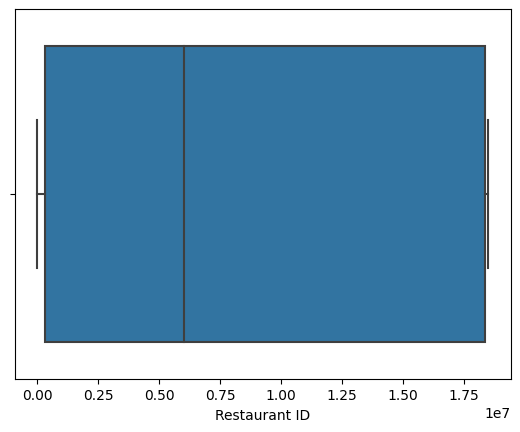

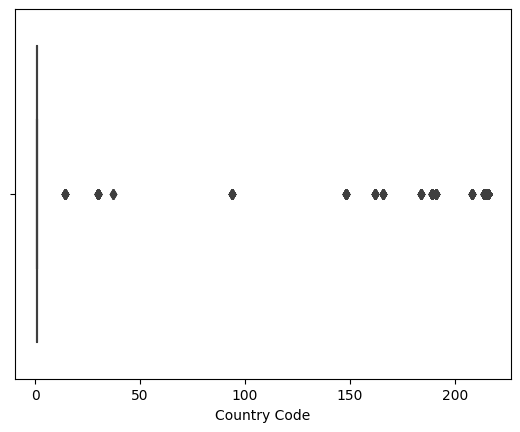

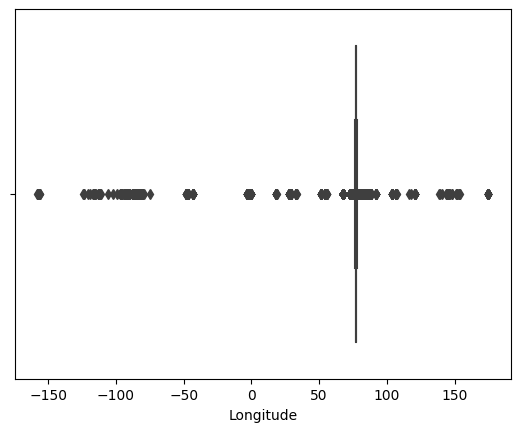

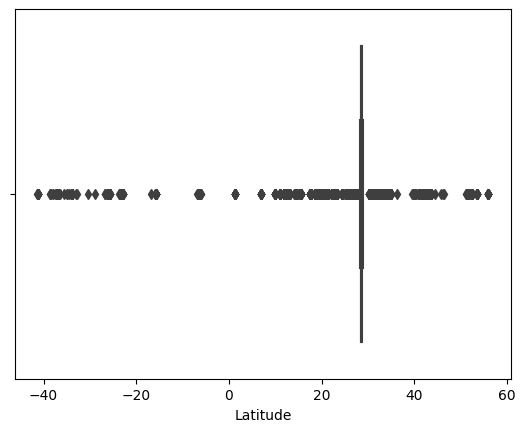

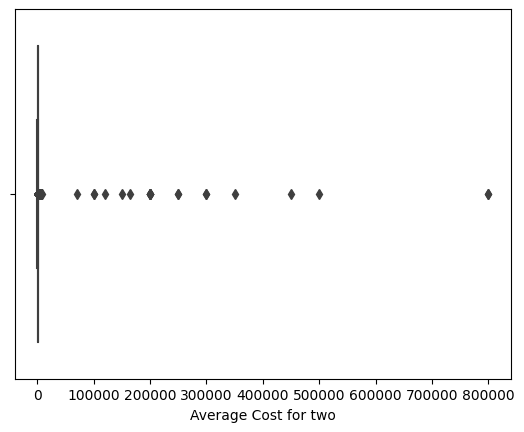

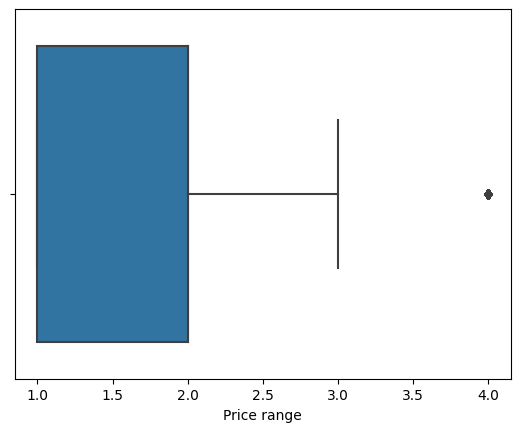

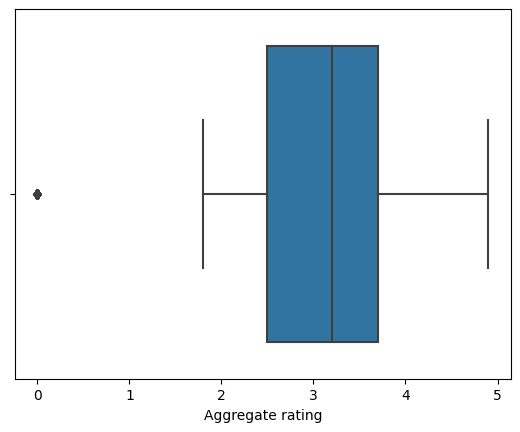

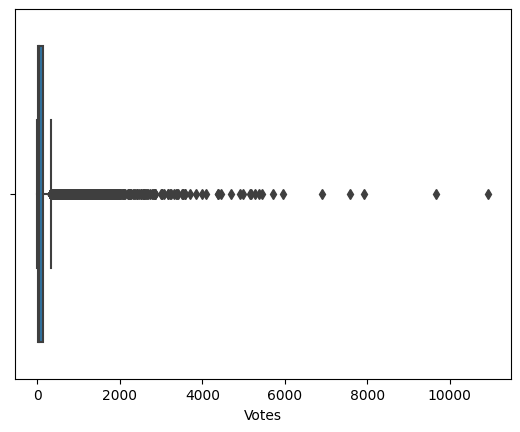

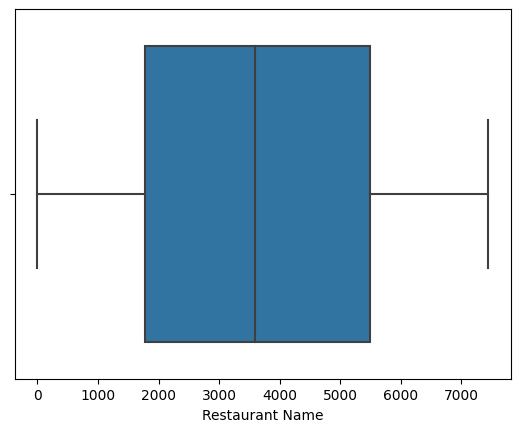

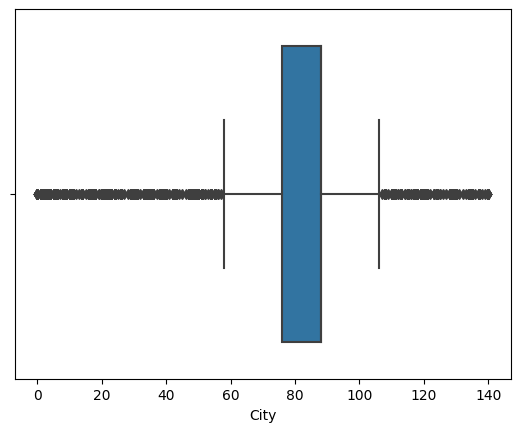

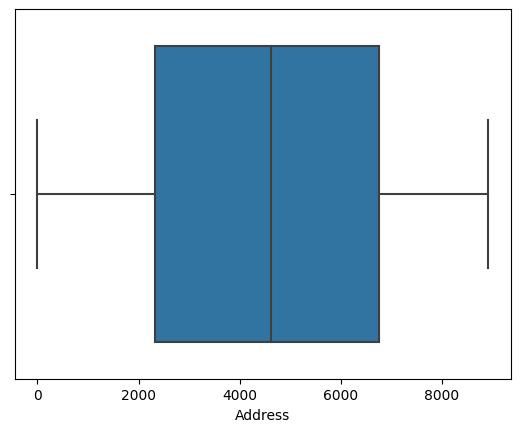

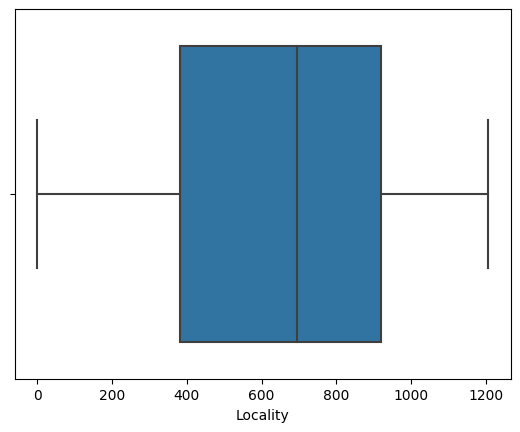

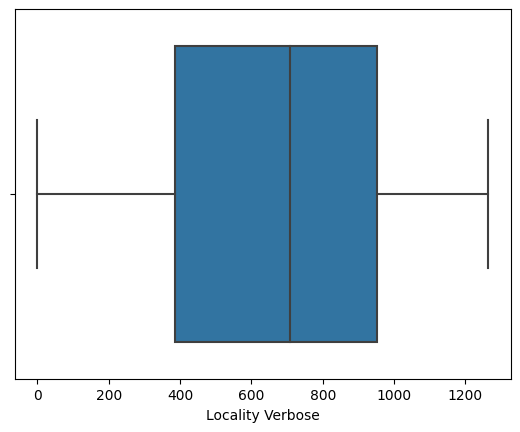

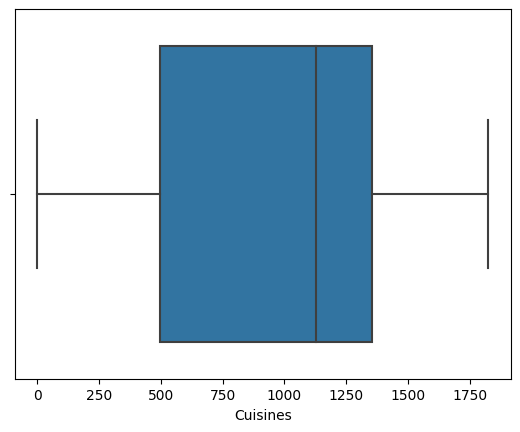

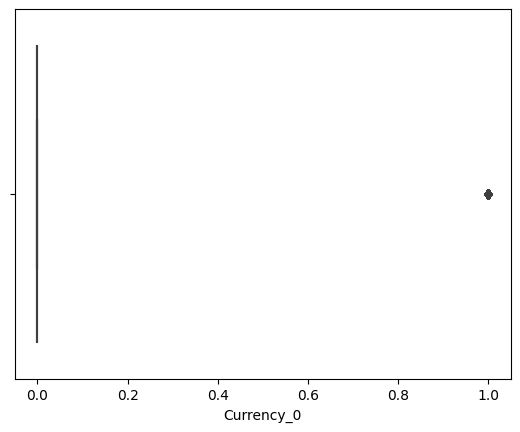

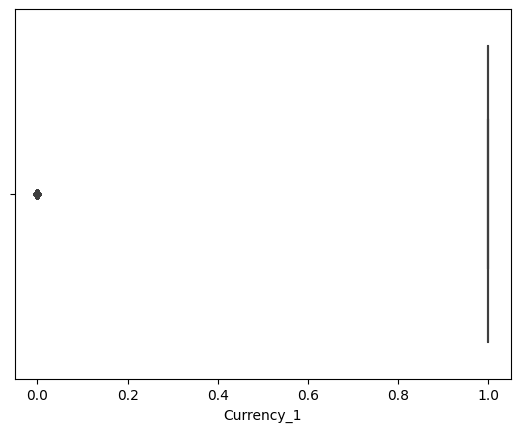

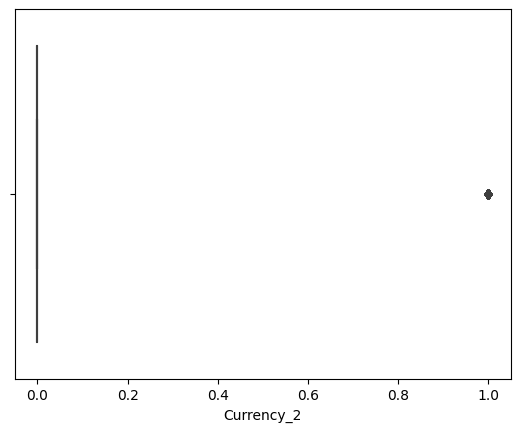

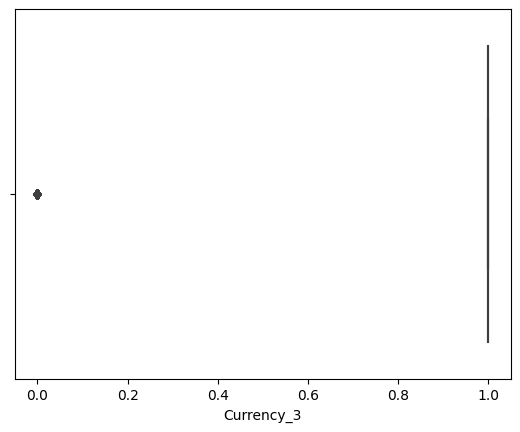

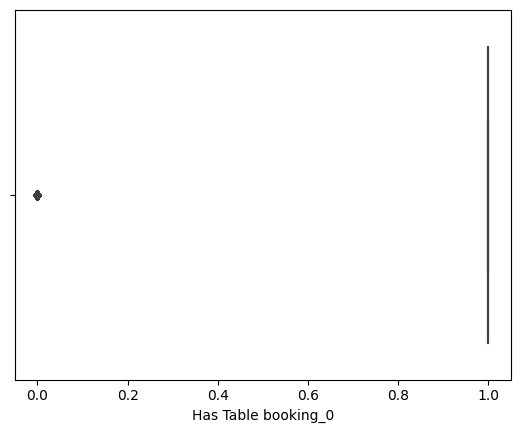

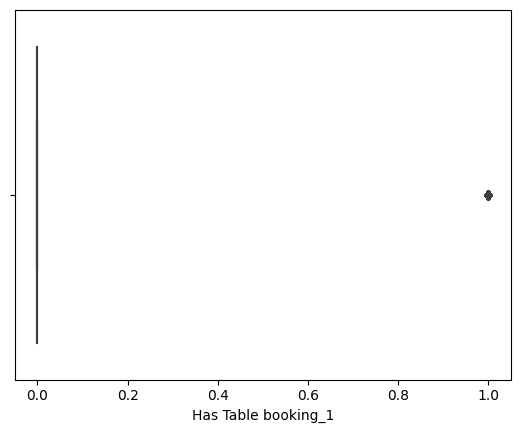

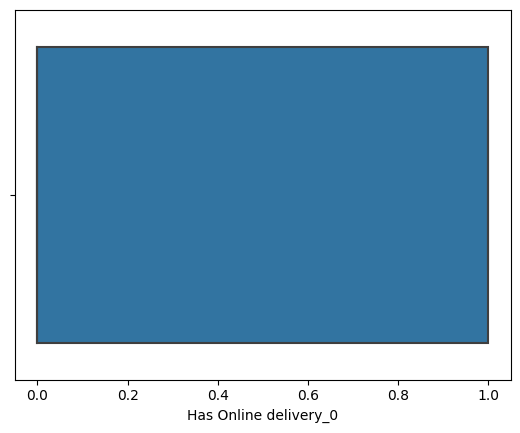

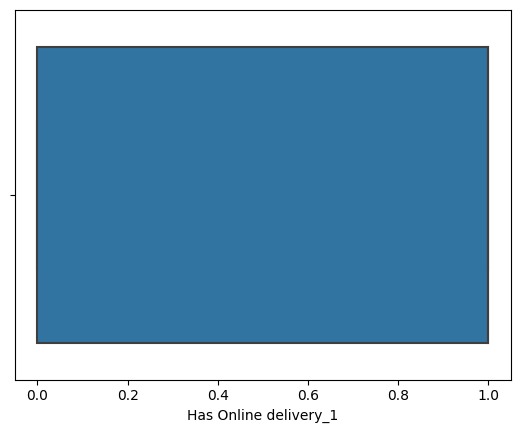

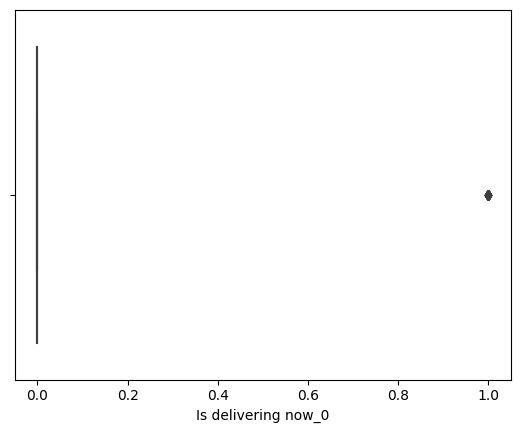

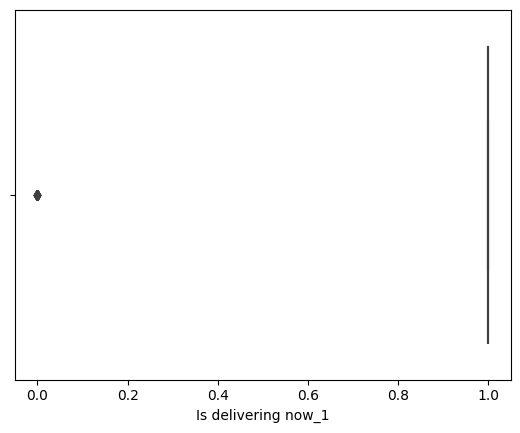

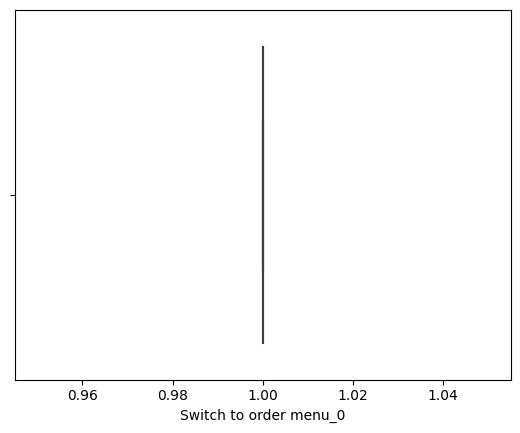

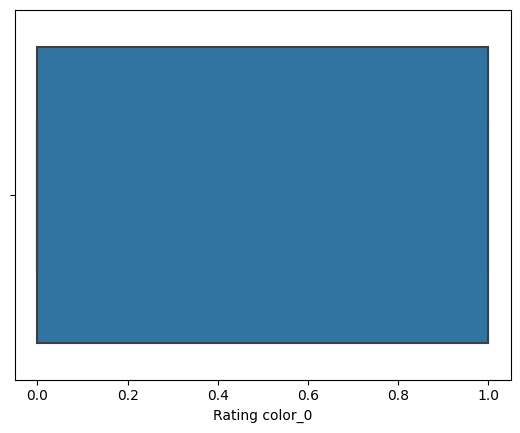

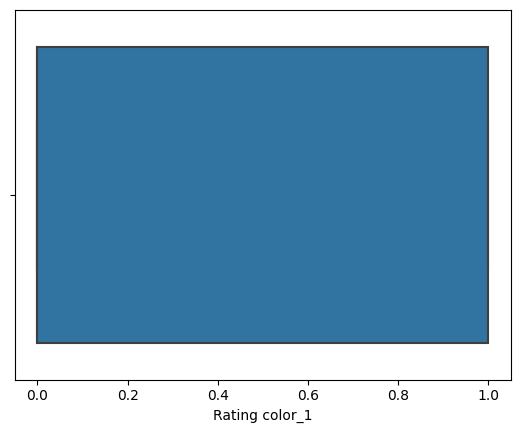

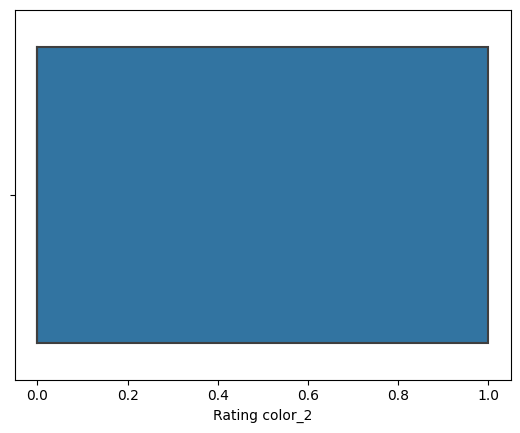

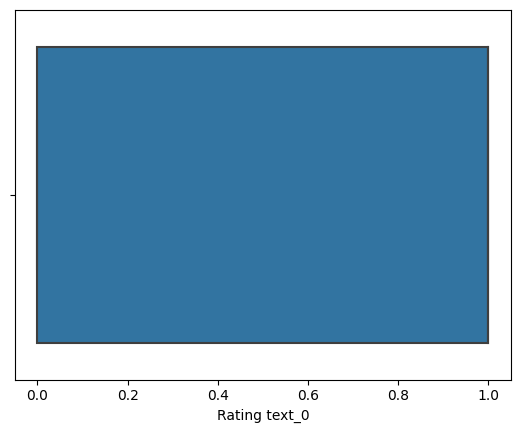

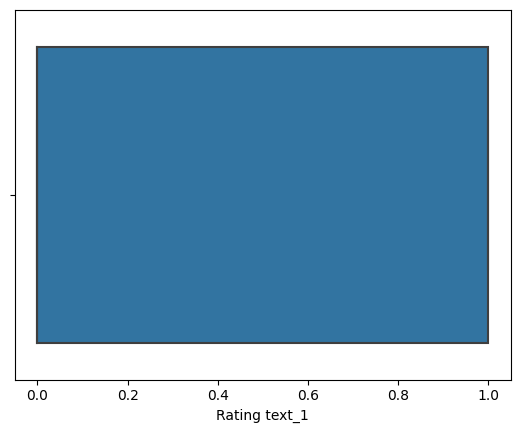

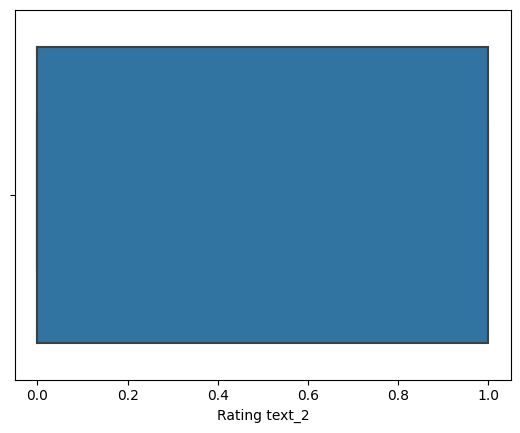

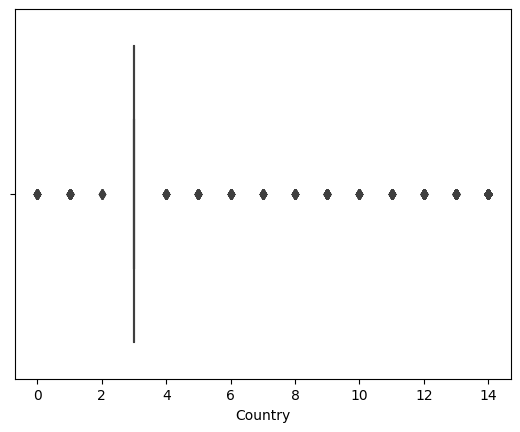

In [110]:
for i in final1.columns:
    sns.boxplot(data=final1, x=i)
    plt.show()

In [111]:
mean = np.mean(final1)
std = np.std(final1)
threshold = 3
z_scores = (final1 - mean) / std

C:\Users\ravin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [112]:
outliers = final1[np.abs(z_scores) > threshold]
df = final1[~final1.isin(outliers)].dropna()

In [113]:
df[df['Longitude'] ==0.00]

Empty DataFrame
Columns: [Restaurant ID, Country Code, Longitude, Latitude, Average Cost for two, Price range, Aggregate rating, Votes, Restaurant Name, City, Address, Locality, Locality Verbose, Cuisines, Currency_0, Currency_1, Currency_2, Currency_3, Has Table booking_0, Has Table booking_1, Has Online delivery_0, Has Online delivery_1, Is delivering now_0, Is delivering now_1, Switch to order menu_0, Rating color_0, Rating color_1, Rating color_2, Rating text_0, Rating text_1, Rating text_2, Country]
Index: []

[0 rows x 32 columns]

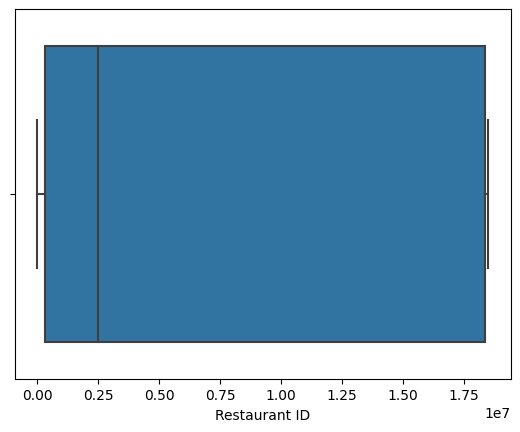

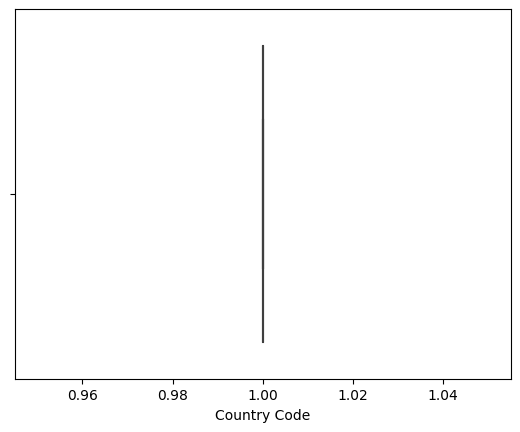

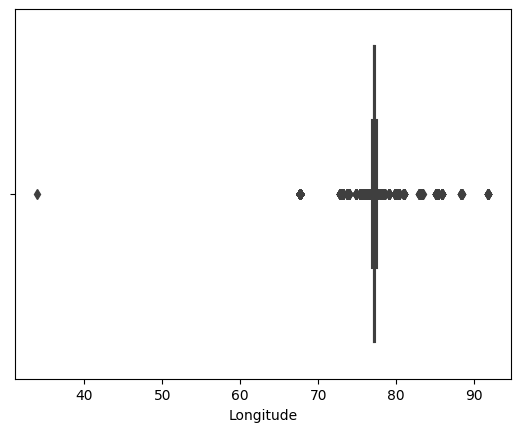

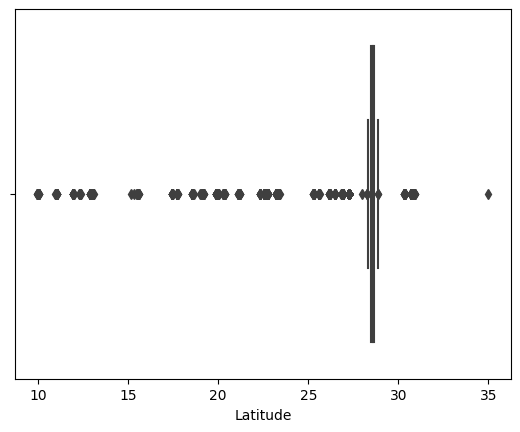

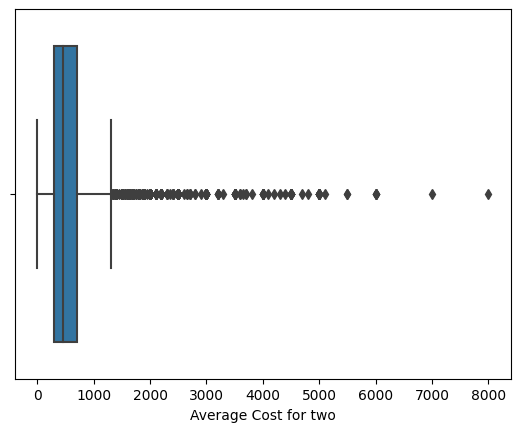

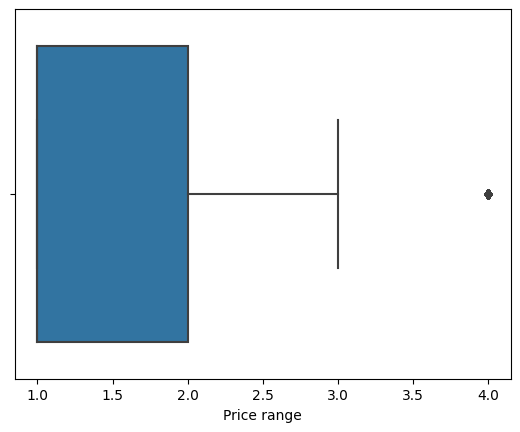

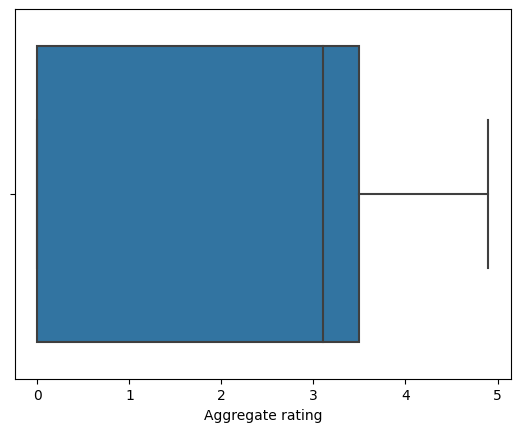

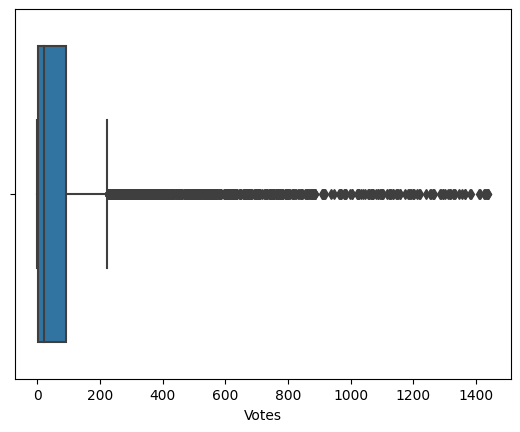

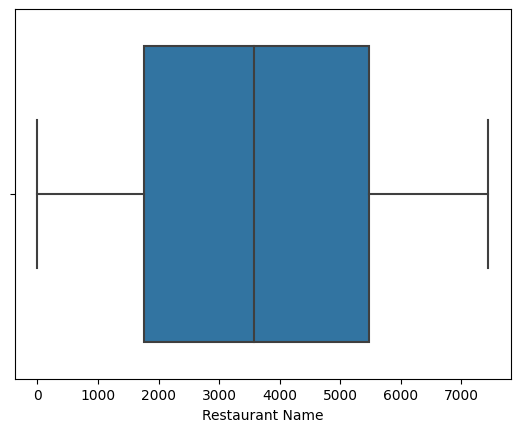

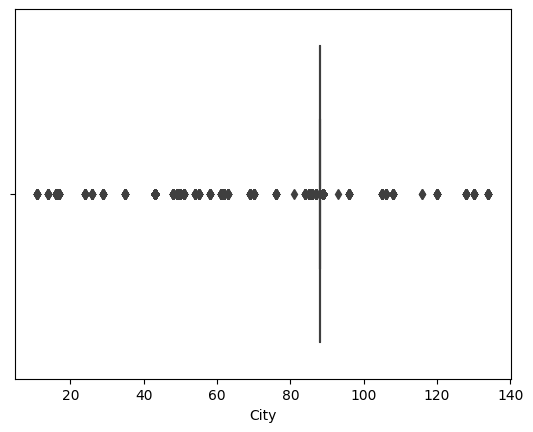

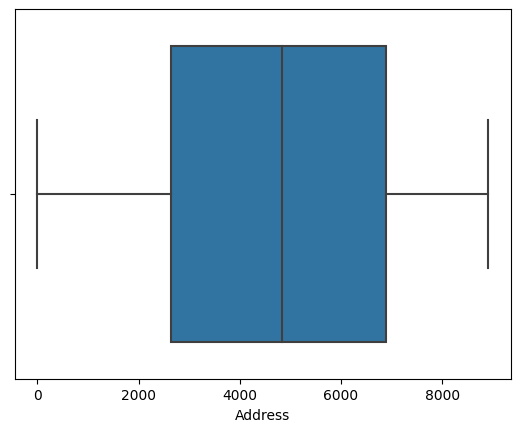

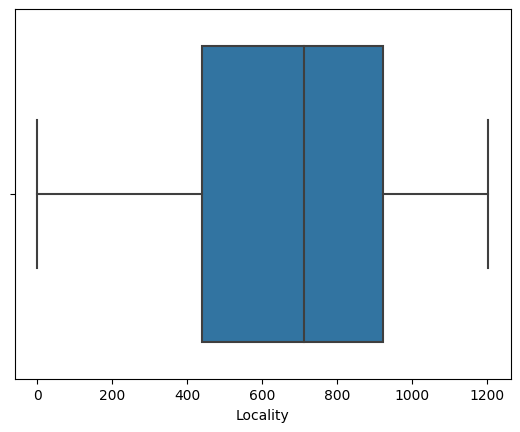

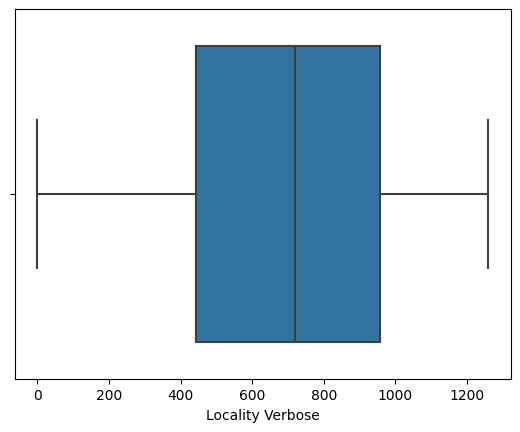

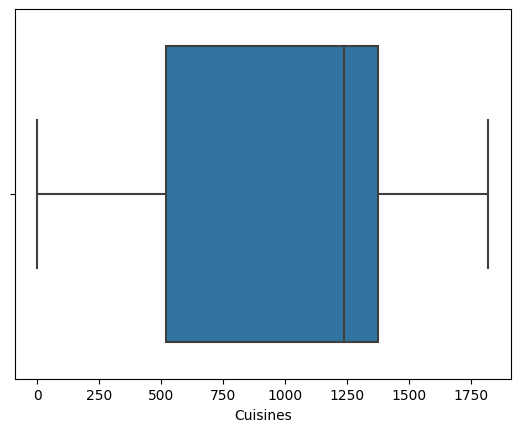

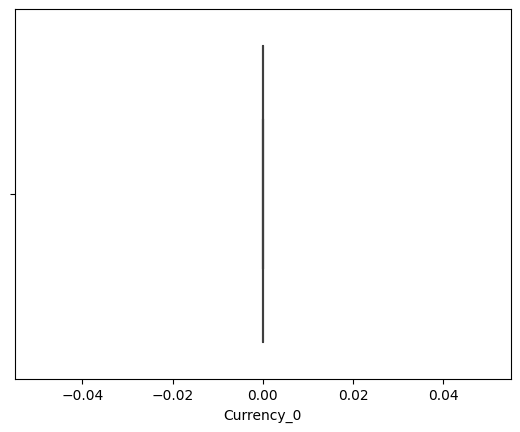

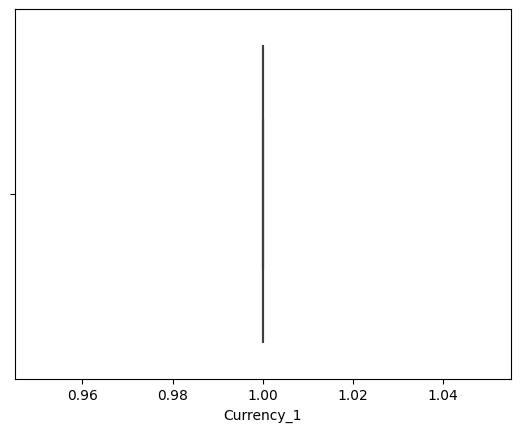

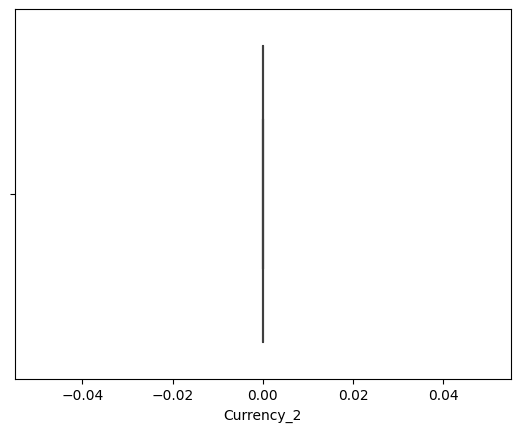

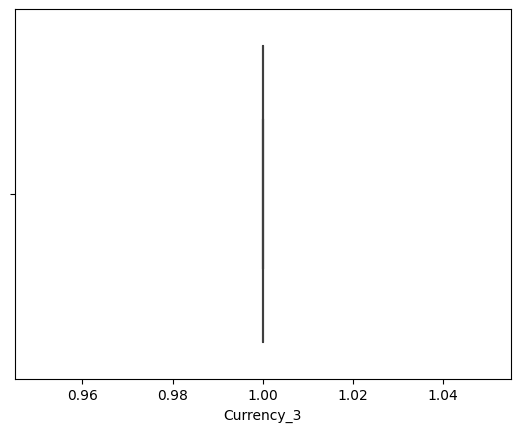

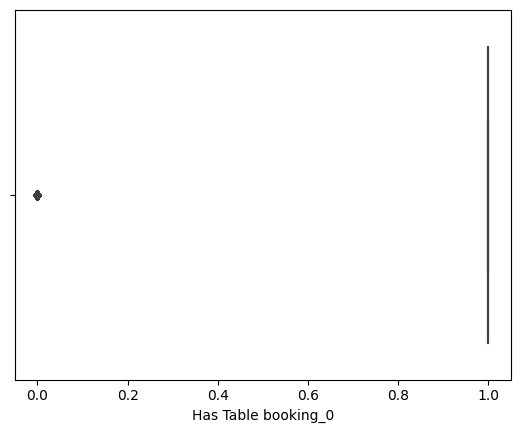

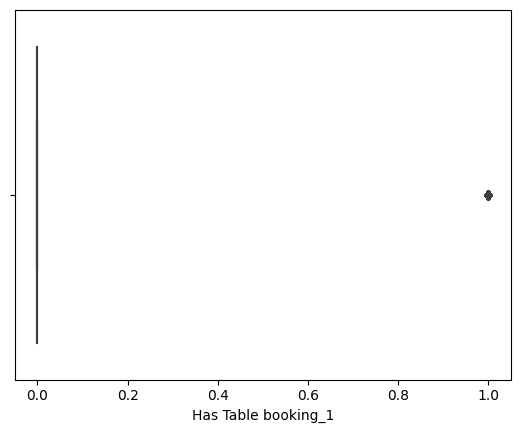

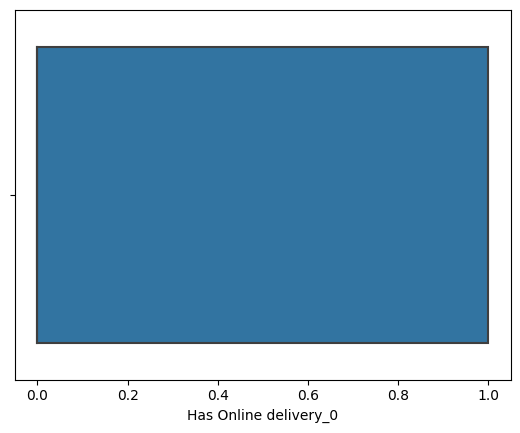

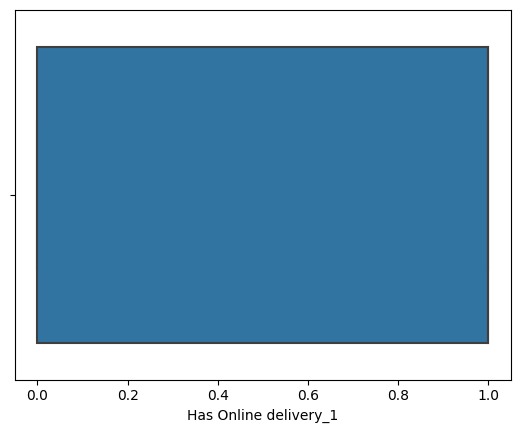

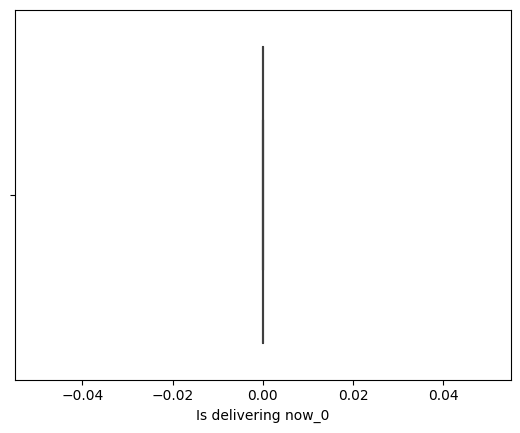

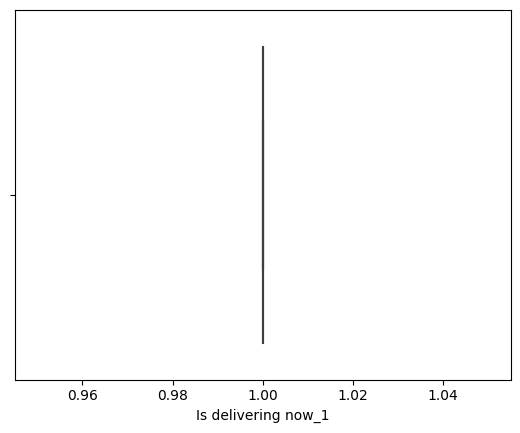

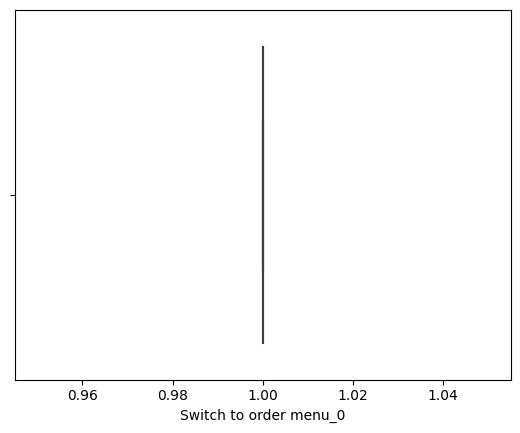

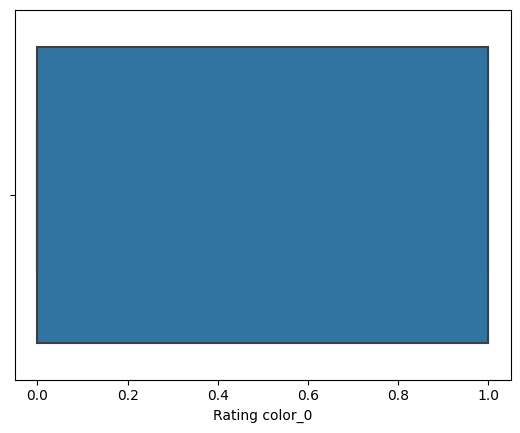

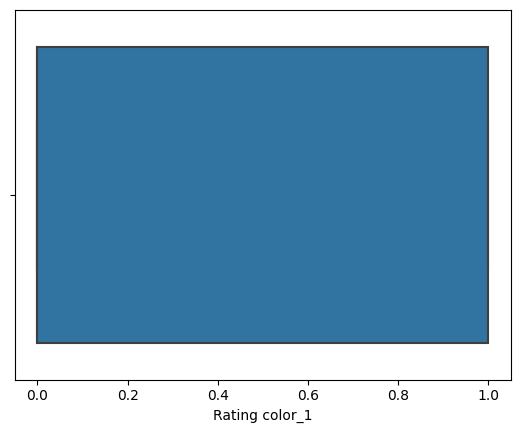

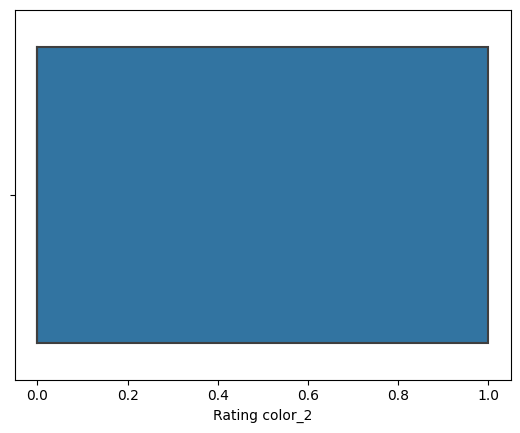

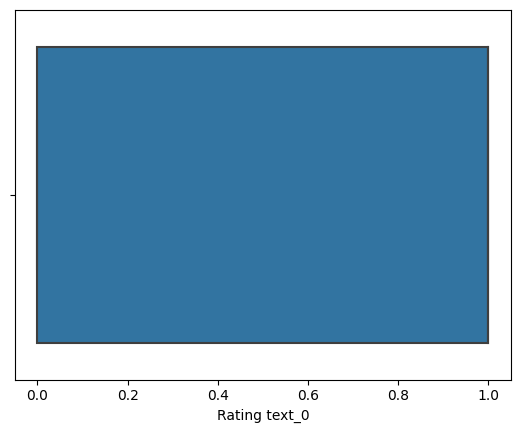

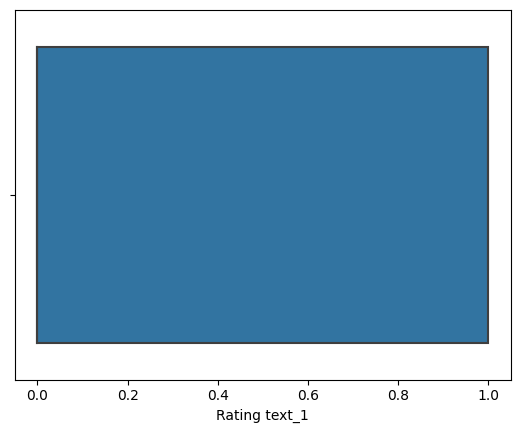

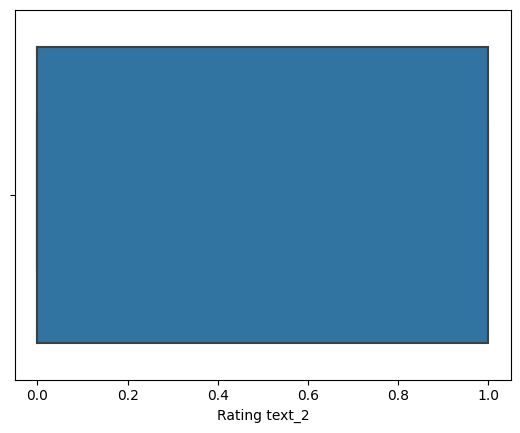

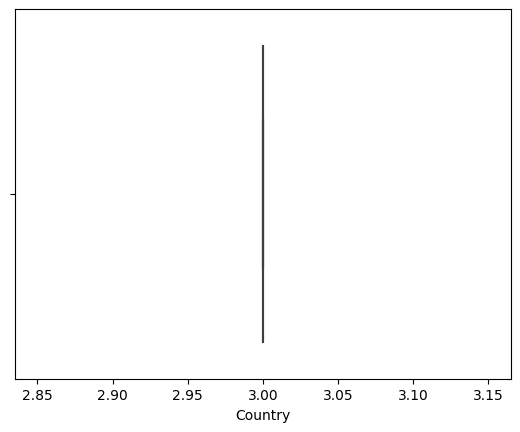

In [114]:
for i in df.columns:
    sns.boxplot(data=df, x=i)
    plt.show()

# Loss of Information

In [115]:
1164 / 9551 *100

12.187205528216941

In [116]:


x = df.drop(['Average Cost for two'], axis=1)
y = df['Average Cost for two']

# Relationship between input and output

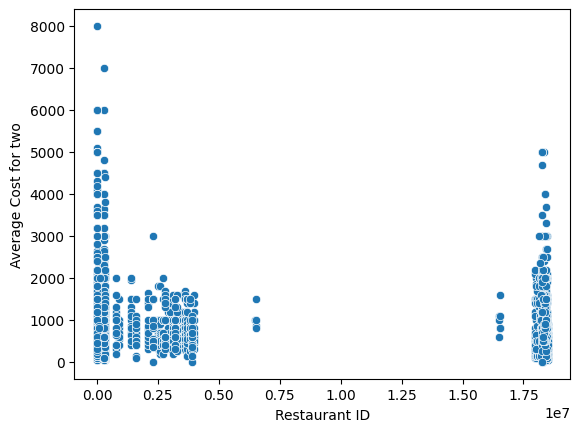

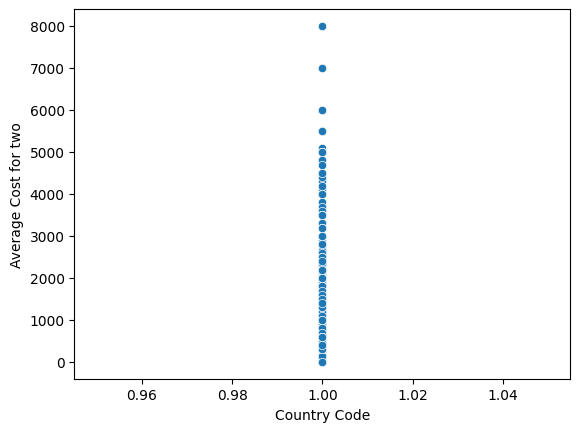

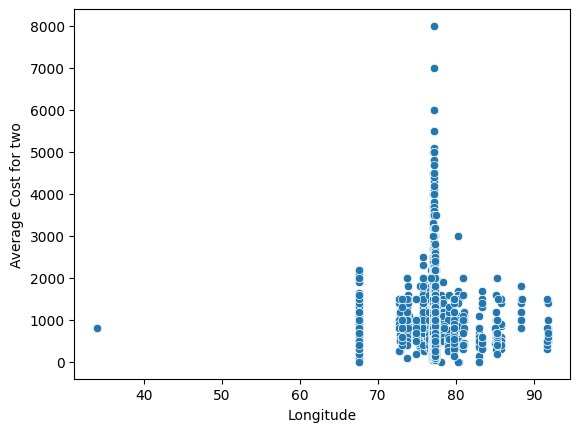

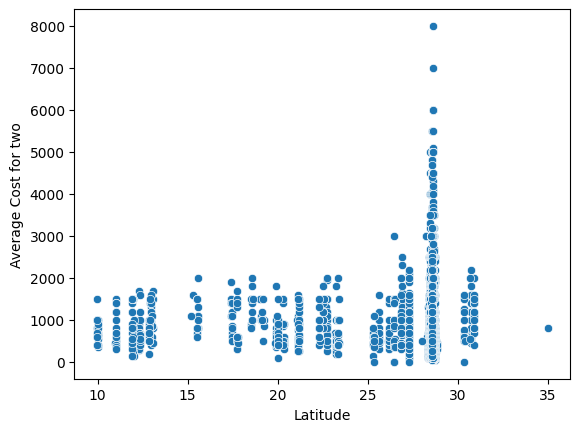

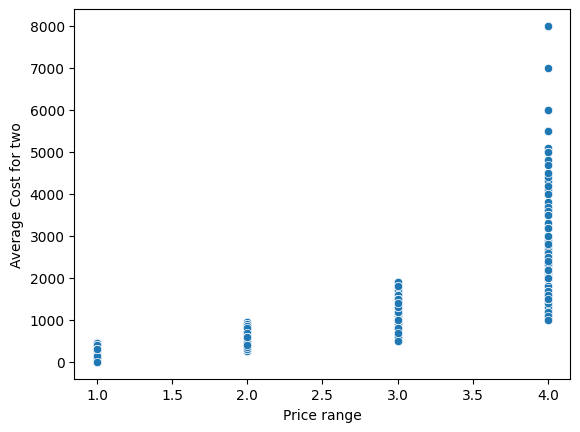

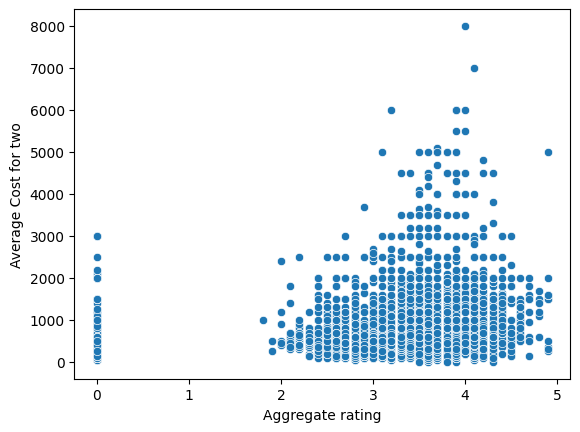

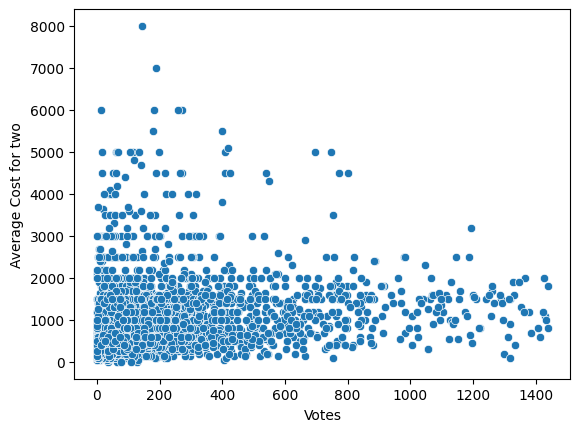

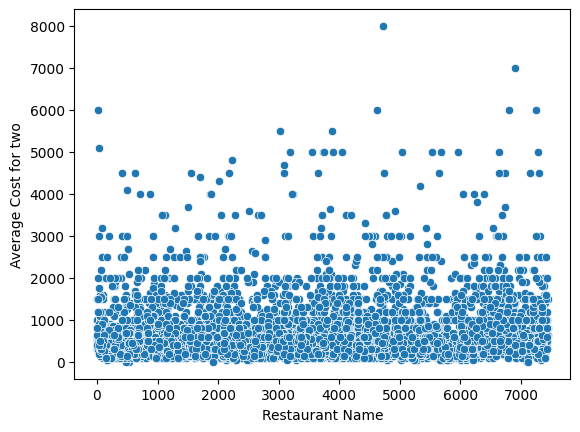

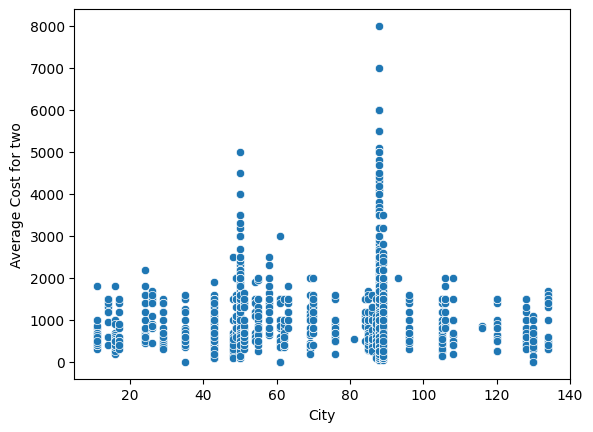

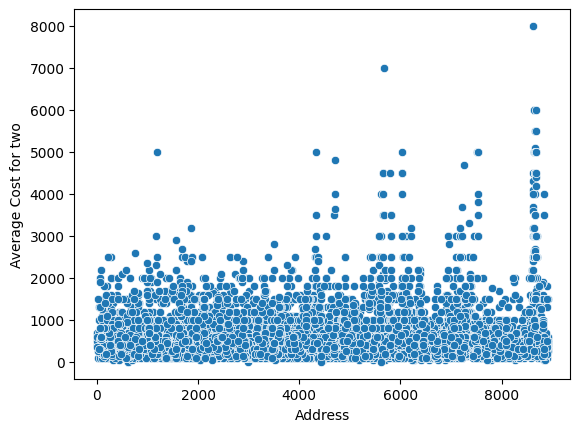

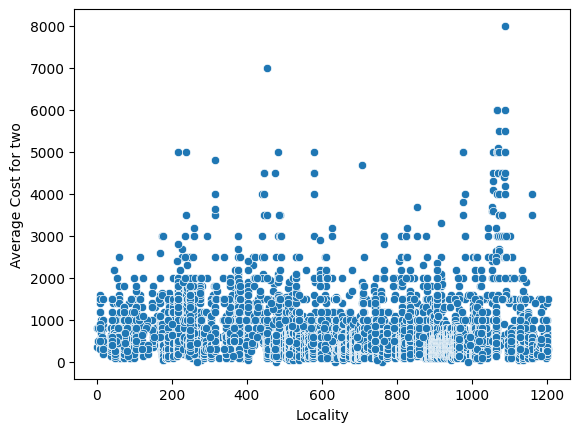

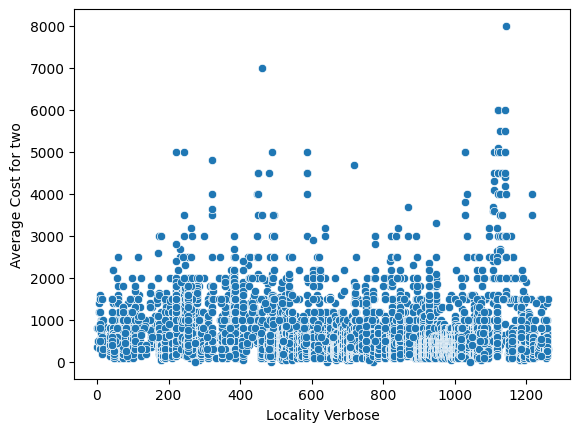

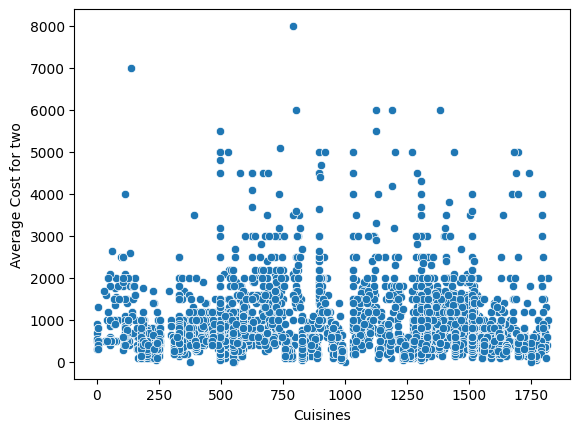

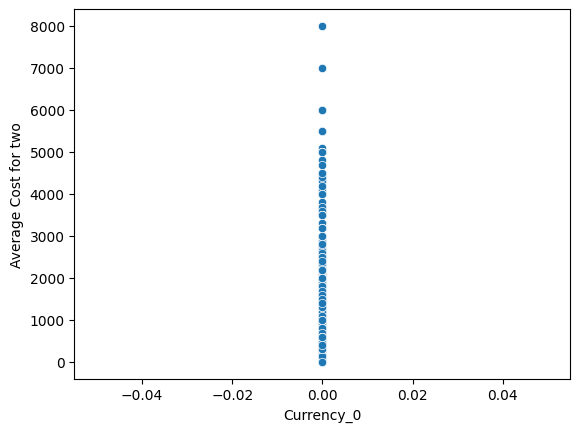

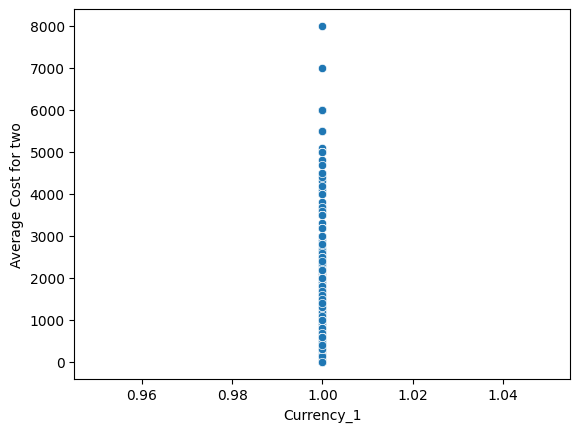

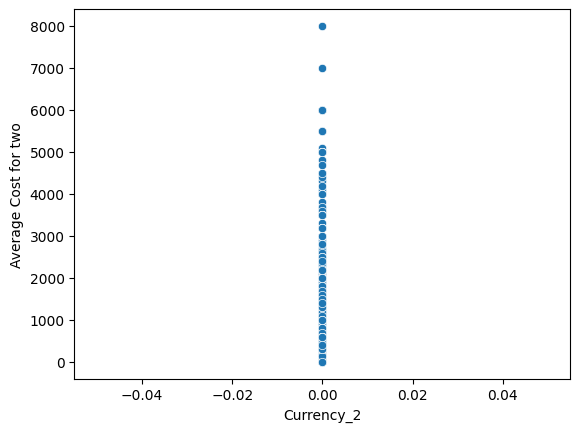

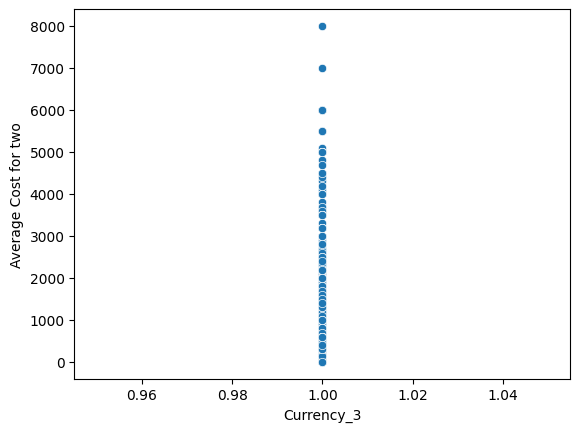

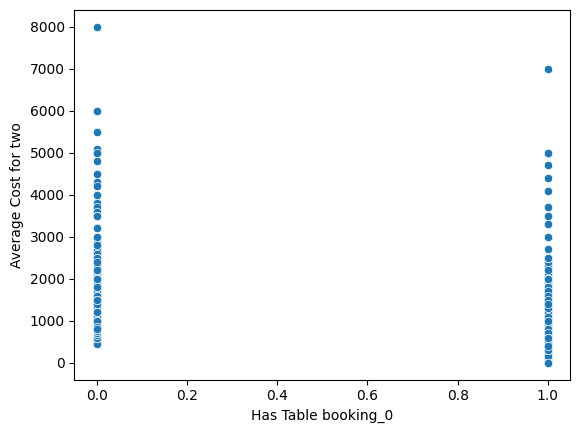

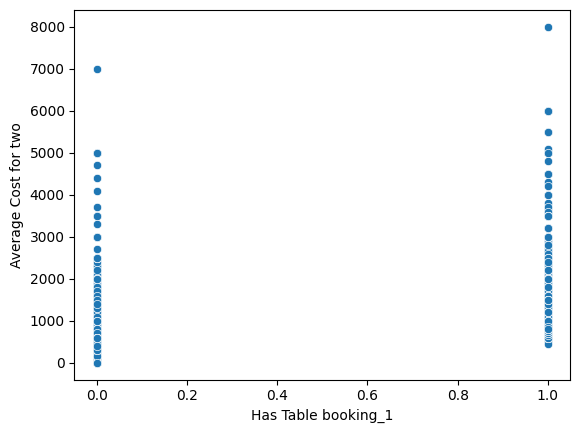

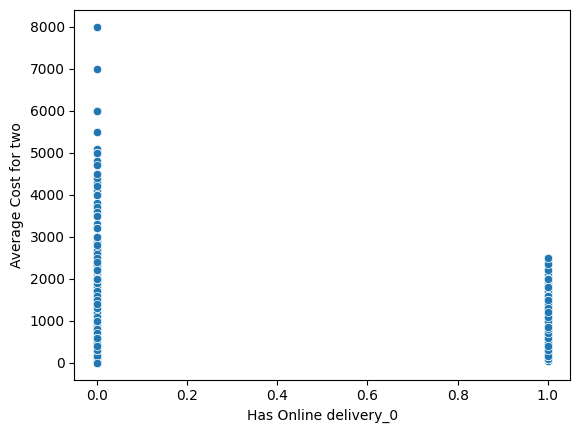

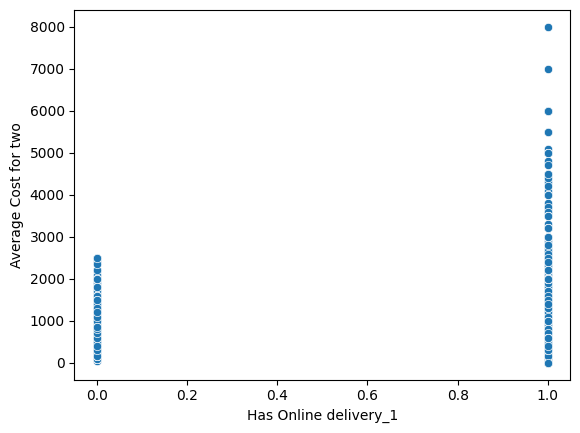

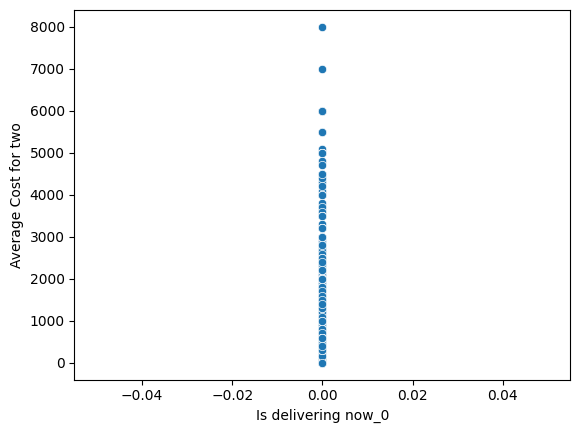

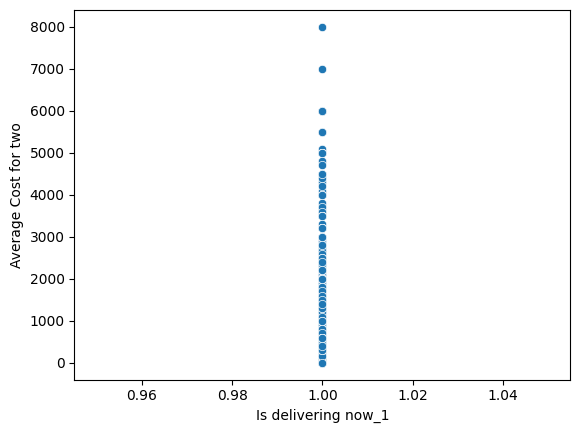

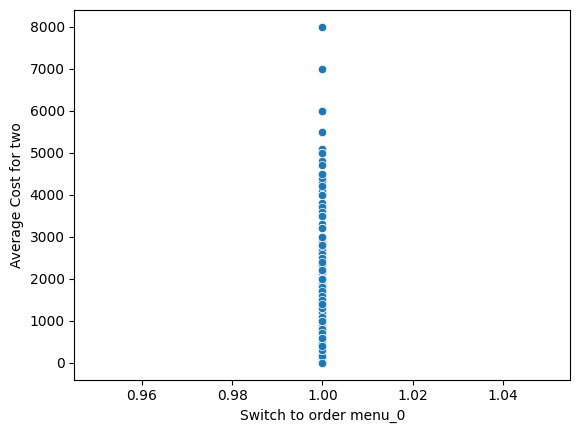

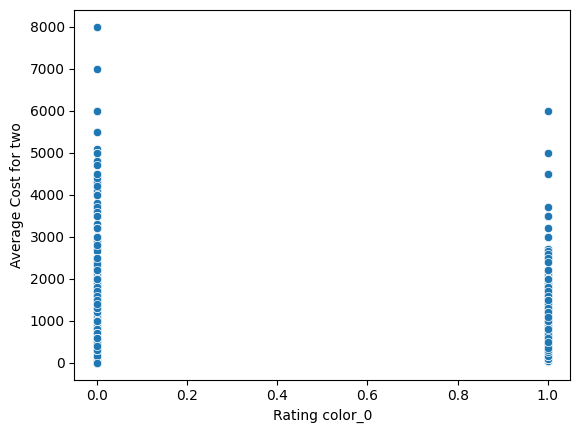

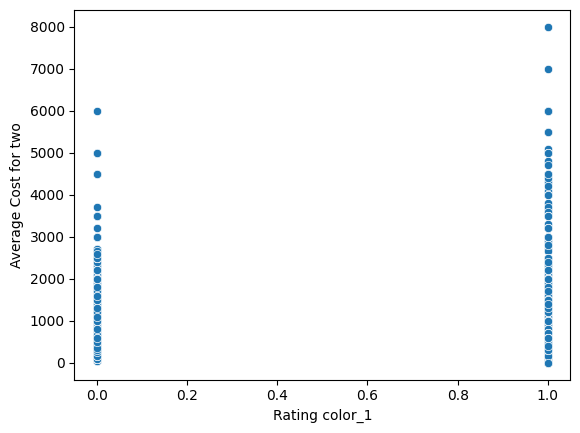

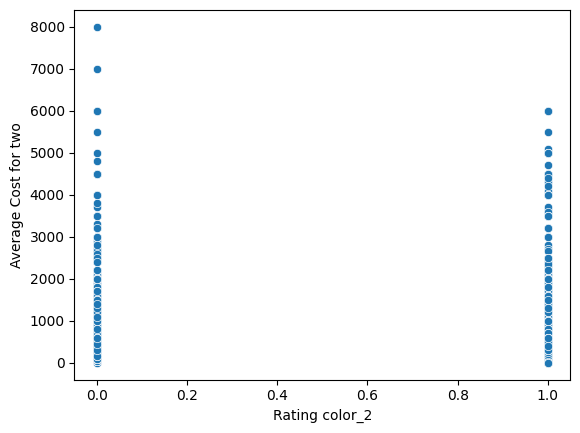

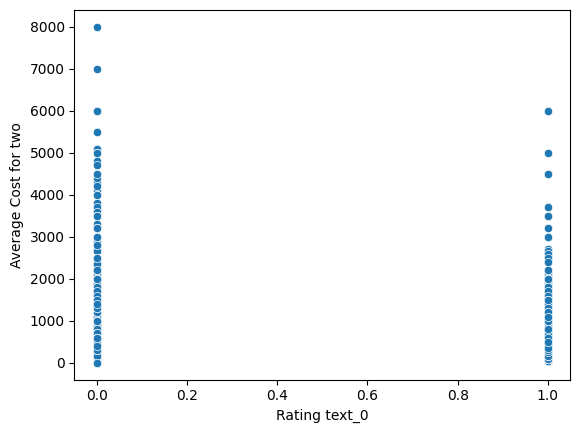

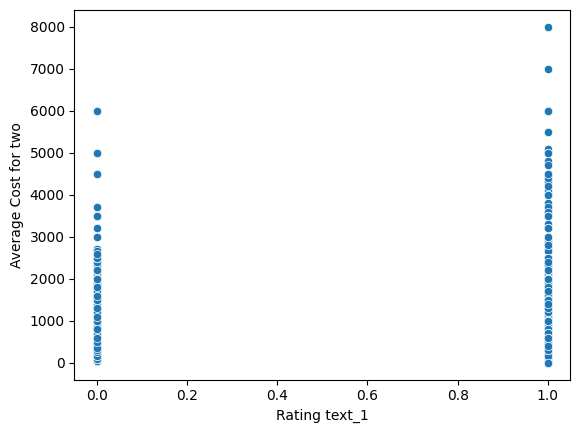

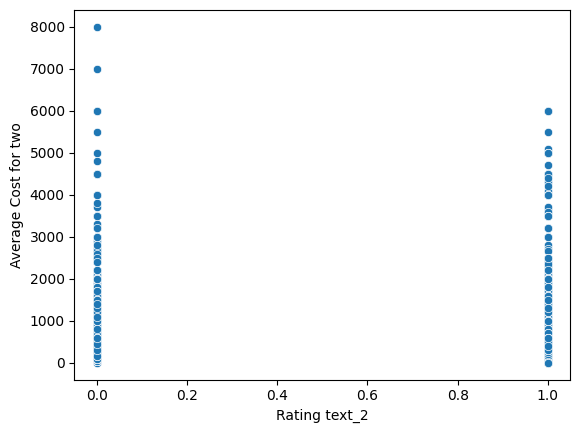

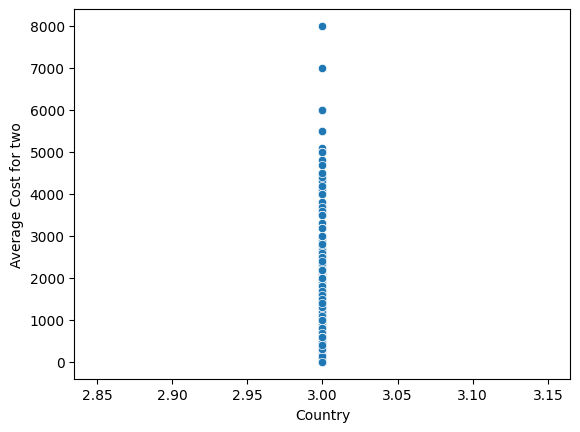

In [117]:
for i in x.columns:
    sns.scatterplot(data=x, x=i, y=y)
    plt.show()
    

# DIstribution of data

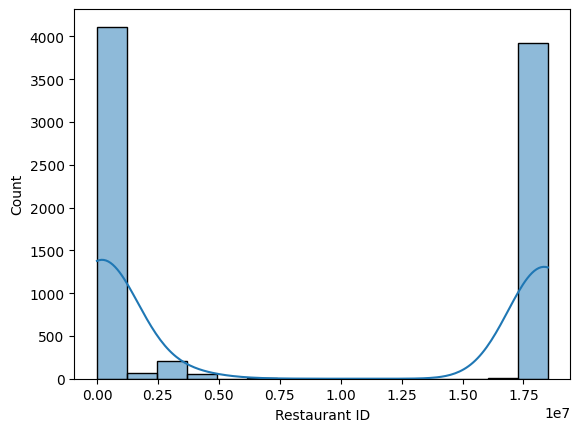

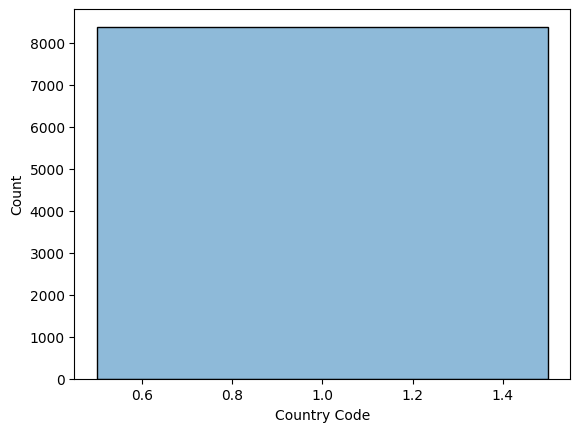

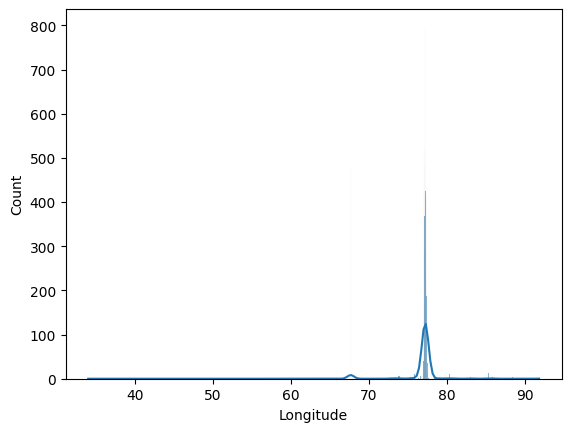

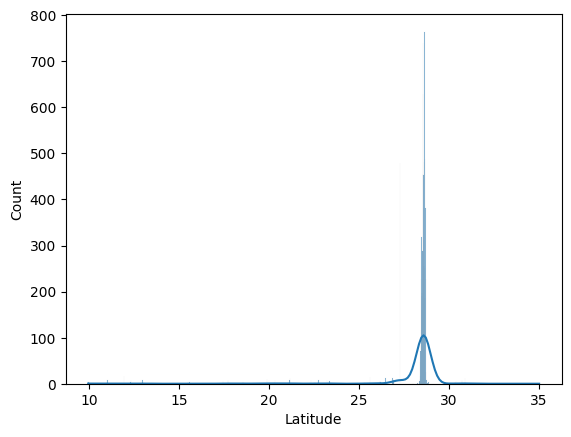

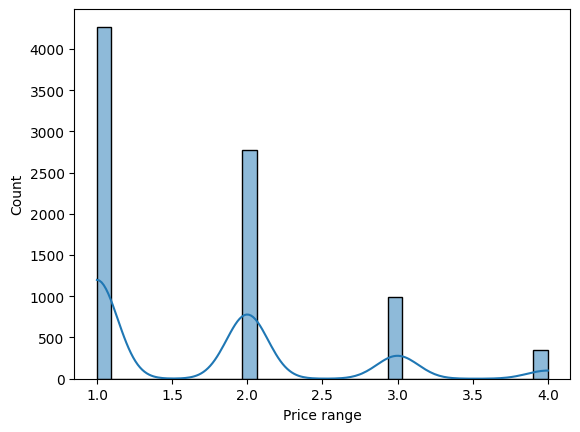

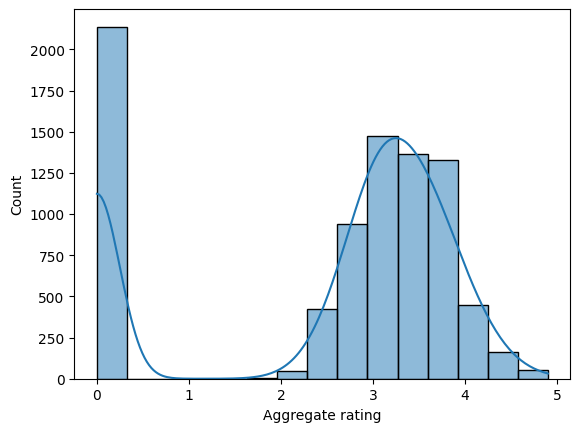

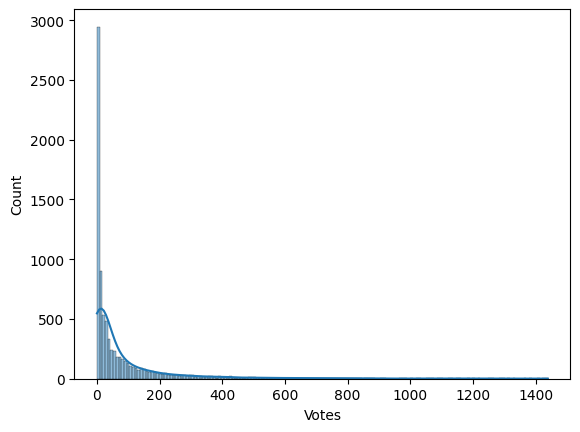

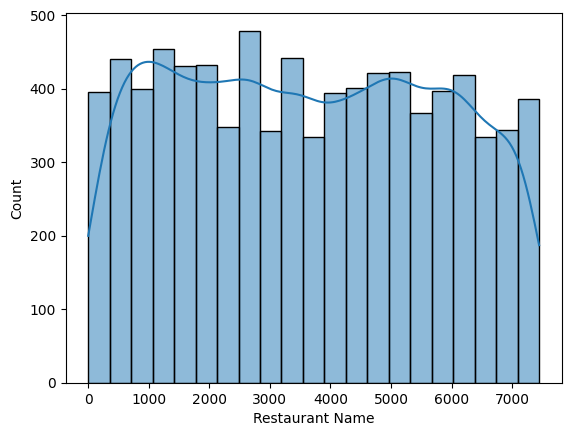

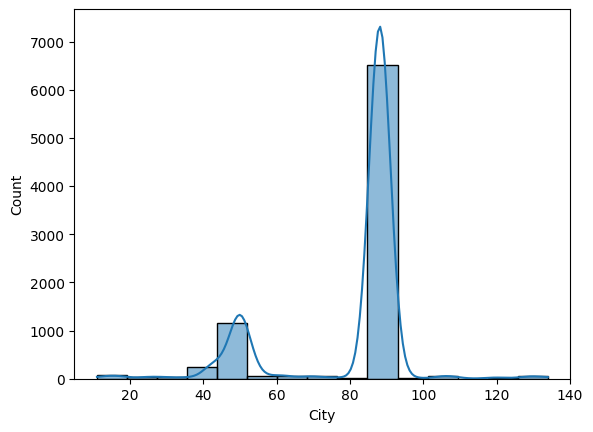

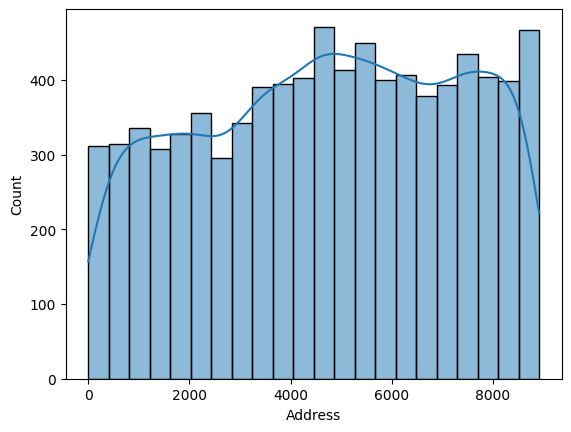

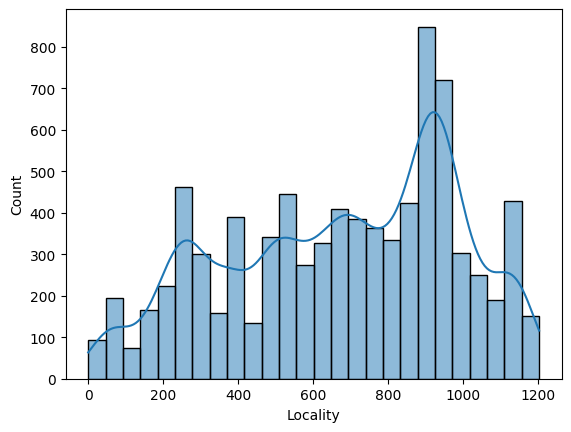

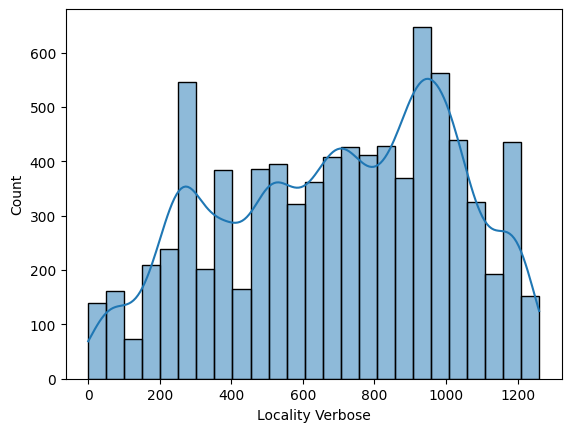

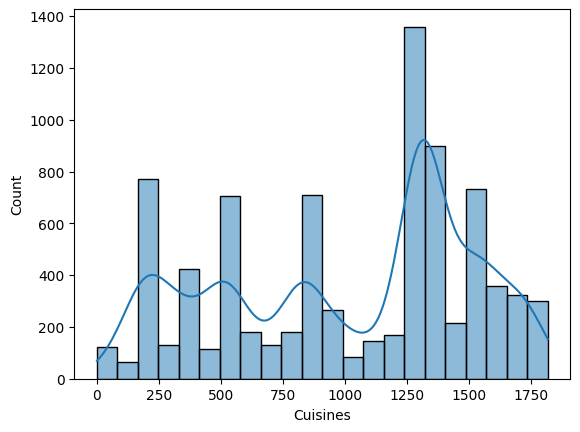

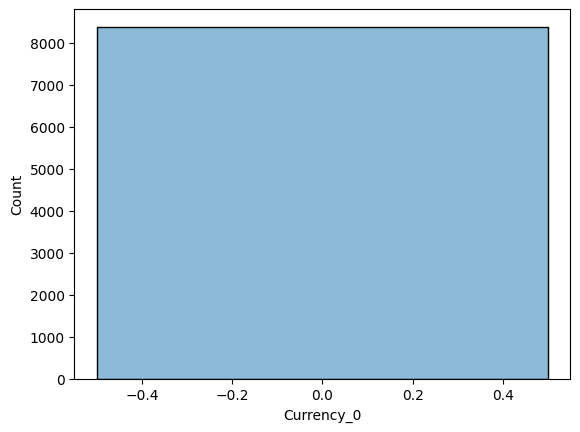

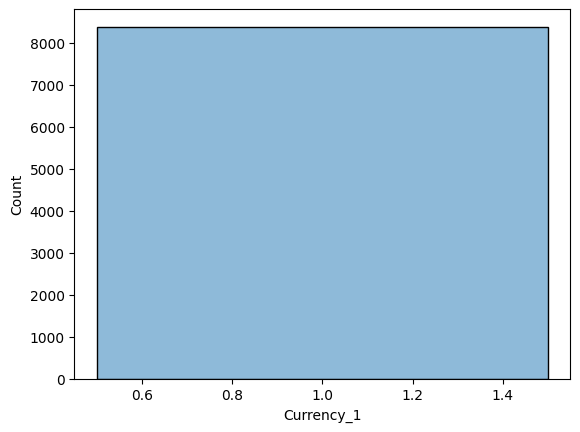

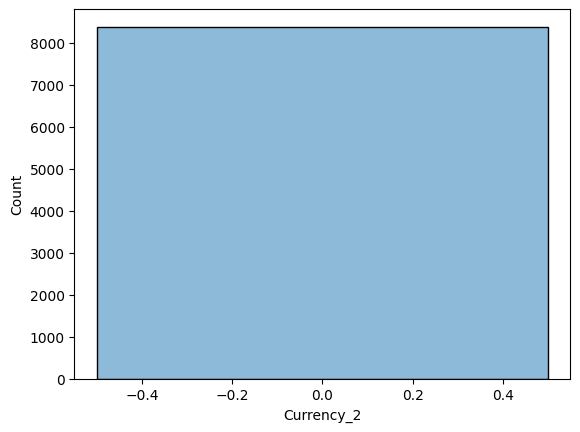

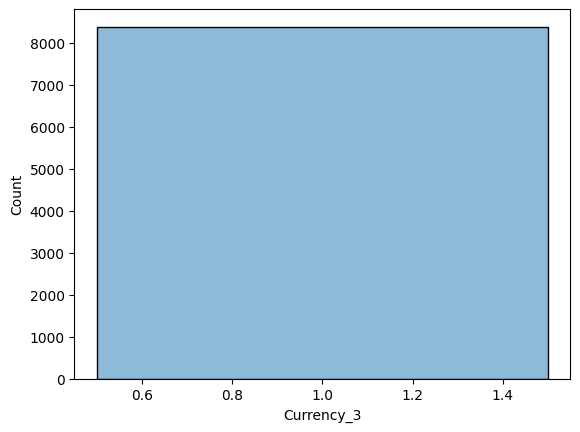

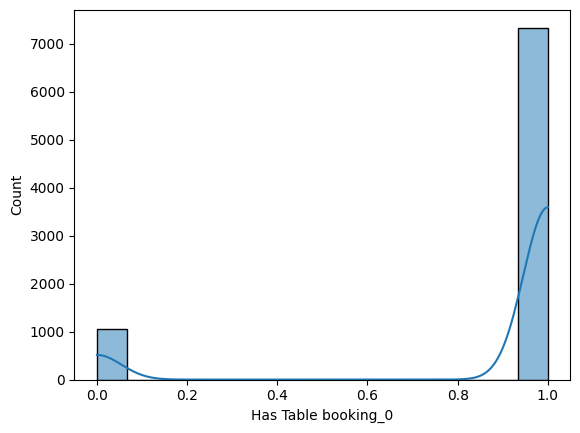

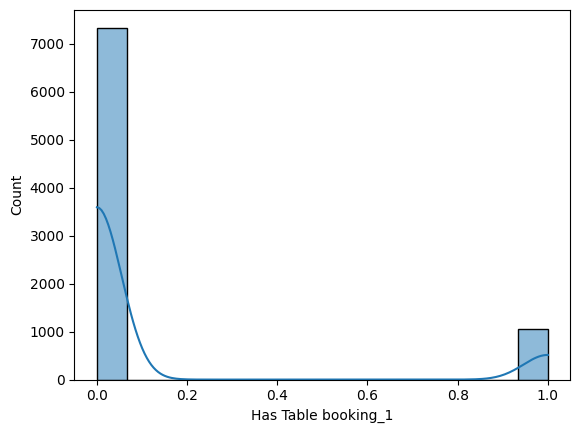

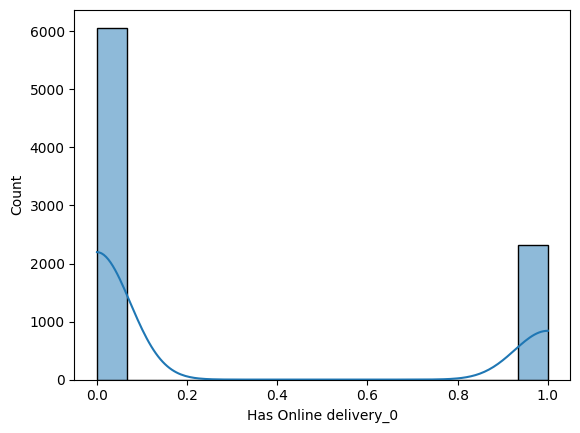

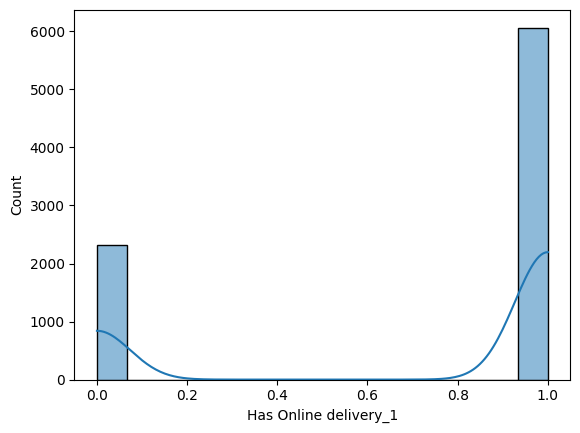

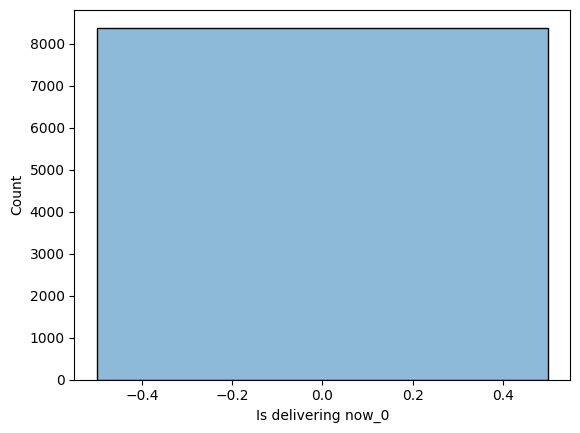

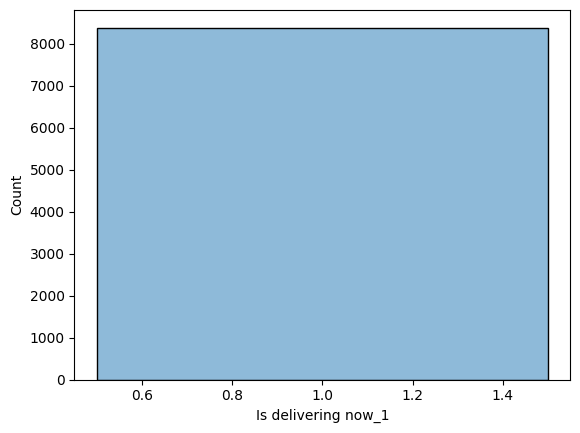

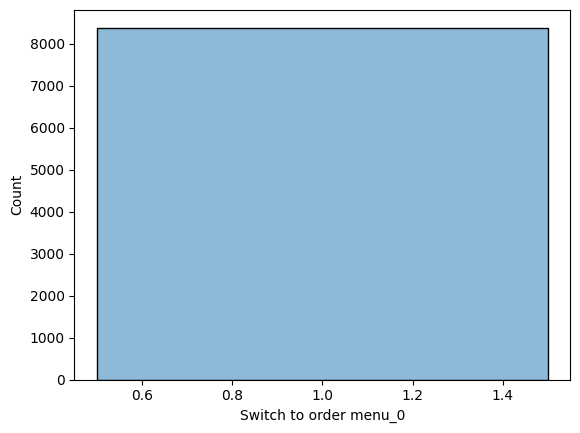

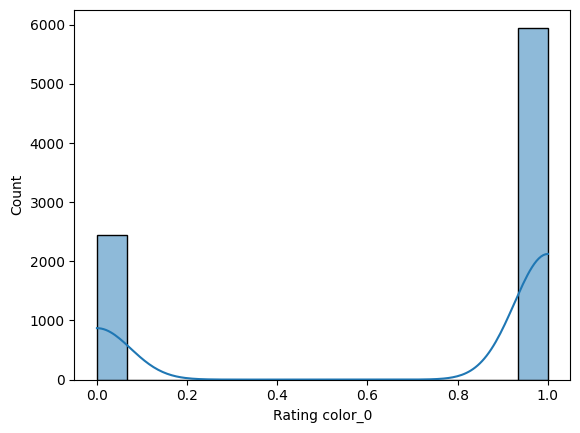

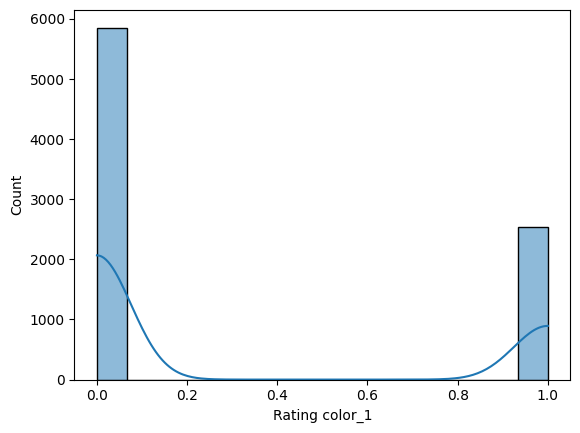

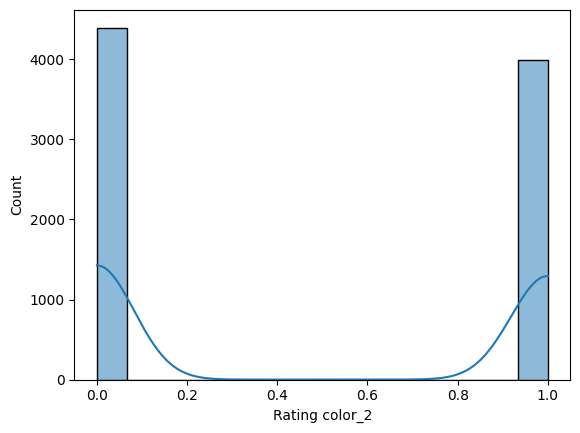

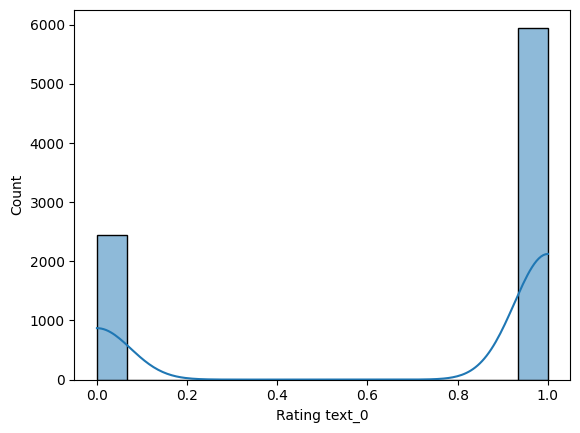

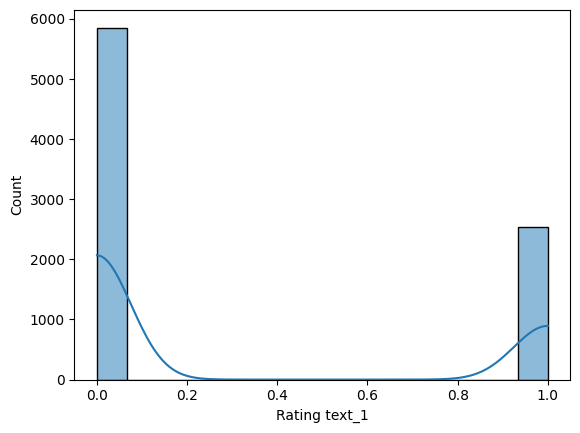

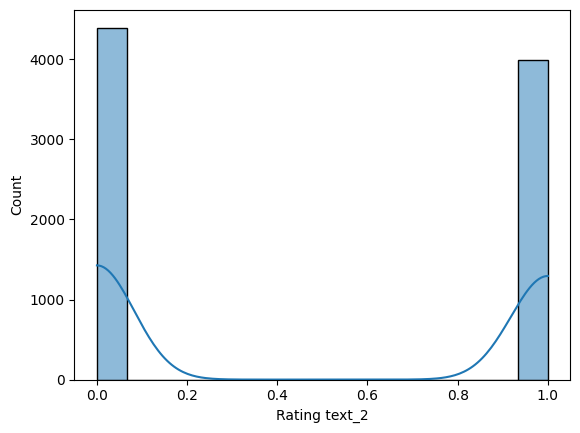

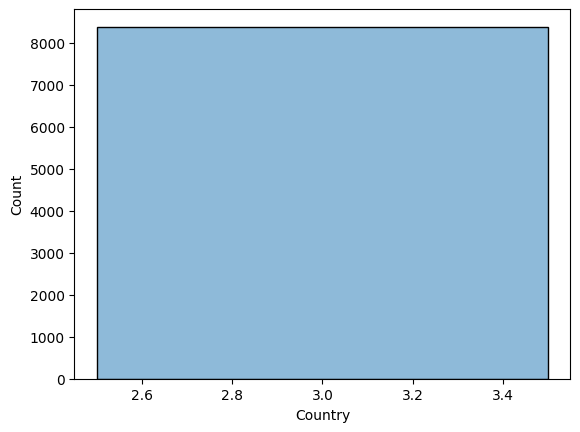

In [118]:
for i in x.columns:
    if x[i].dtype !='object':
        sns.histplot(data=x, x=i, kde=True)
        plt.show()
 

# Transformation

In [119]:
from sklearn.preprocessing import QuantileTransformer

In [120]:
qt = QuantileTransformer()

In [121]:
transformed = pd.DataFrame(qt.fit_transform(x))

In [122]:
transformed

0    1         2         3         4         5         6   \
0     0.499499  0.0  0.069730  0.022673  0.898899  0.785786  0.893393   
1     0.499813  0.0  0.029029  0.080581  0.898899  0.627127  0.687187   
2     0.499505  0.0  0.069927  0.022060  0.674174  0.627127  0.682683   
3     0.500501  0.0  0.069599  0.022626  0.674174  0.509009  0.472973   
4     0.499715  0.0  0.070088  0.022385  0.674174  0.682182  0.628629   
...        ...  ...       ...       ...       ...       ...       ...   
8382  0.506509  0.0  0.990818  0.018064  0.674174  0.785786  0.867193   
8383  0.506904  0.0  0.029029  0.080581  0.674174  0.830330  0.736236   
8384  0.507480  0.0  0.989996  0.017517  0.674174  0.978979  0.850746   
8385  0.506506  0.0  0.990380  0.017621  1.000000  0.870370  0.711211   
8386  0.506506  0.0  0.989990  0.017617  0.898899  0.986987  0.923173   

            7    8         9   ...   21   22   23   24   25   26   27   28  \
0     0.501594  0.0  0.103143  ...  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0   
1     0.080316  0.0  0.829728  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
2     0.046982  0.0  0.826723  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
3     0.296296  0.0  0.273313  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
4     0.423717  0.0  0.559222  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
...        ...  ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8382  0.259368  1.0  0.383467  ...  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0   
8383  0.466383  1.0  0.771977  ...  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0   
8384  0.684848  1.0  0.765442  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
8385  0.966730  1.0  0.967714  ...  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0   
8386  0.333851  1.0  0.015983  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   

       29   30  
0     1.0  0.0  
1     0.0  0.0  
2     0.0  0.0  
3     0.0  0.0  
4     0.0  0.0  
...   ...  ...  
8382  1.0  0.0  
8383  1.0  0.0  
8384  0.0  0.0  
8385  1.0  0.0  
8386  0.0  0.0  

[8387 rows x 31 columns]

# DISTRIBUTION AFTER TRANSFORMATION

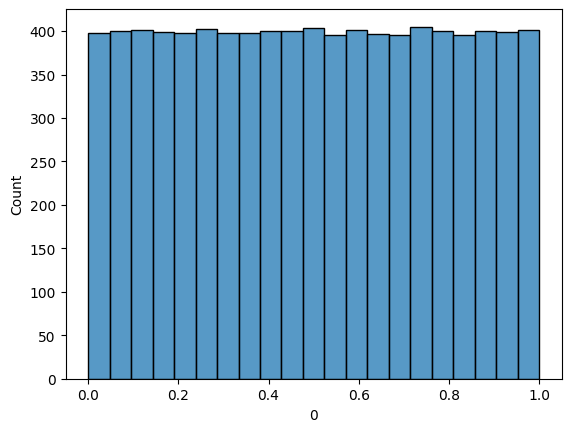

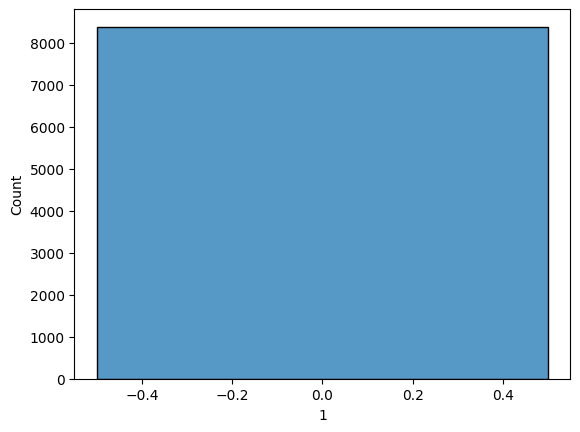

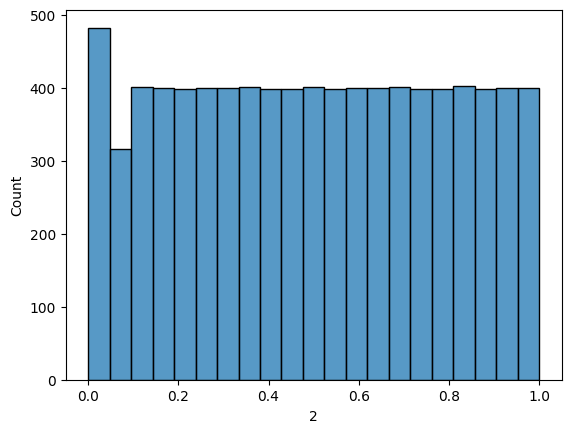

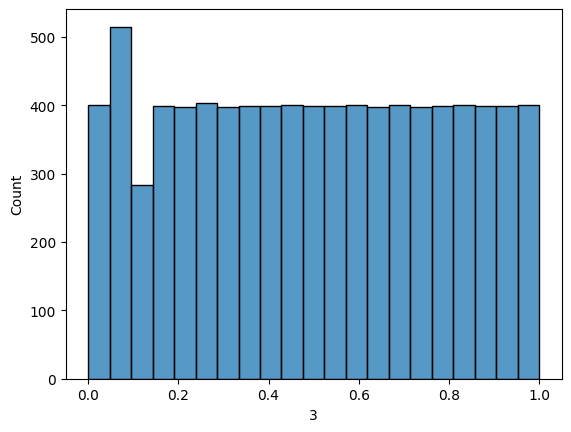

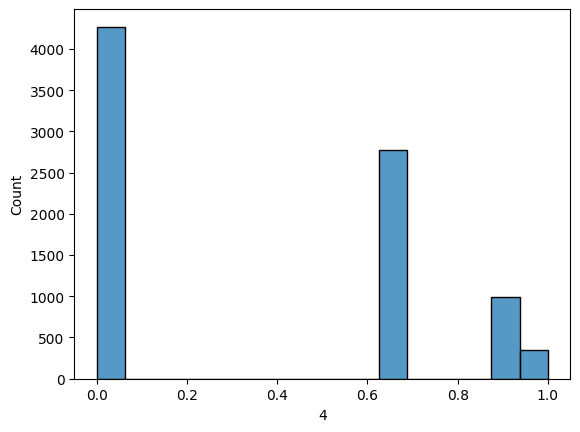

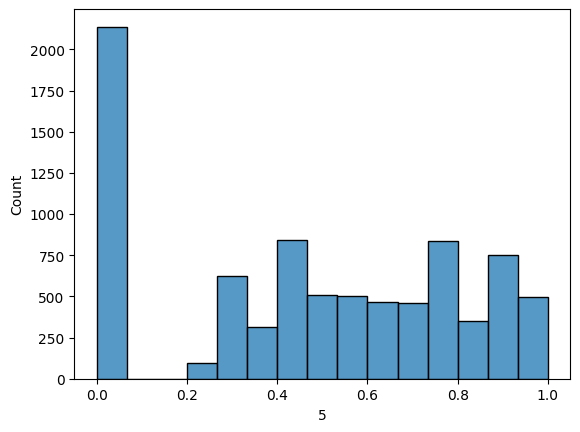

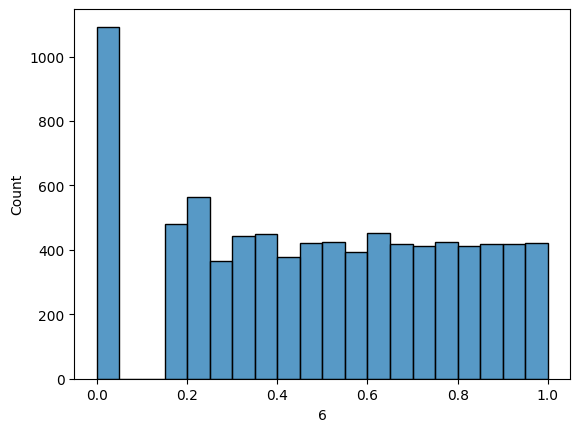

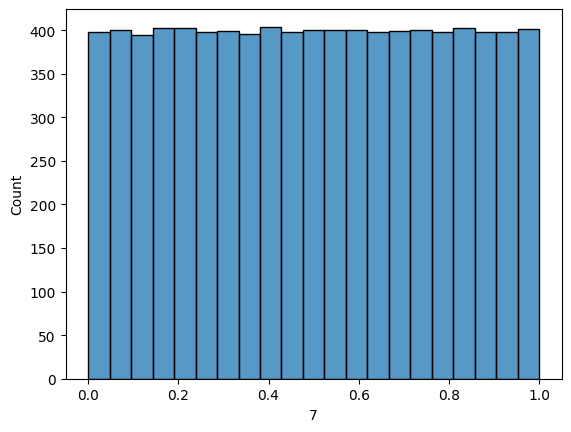

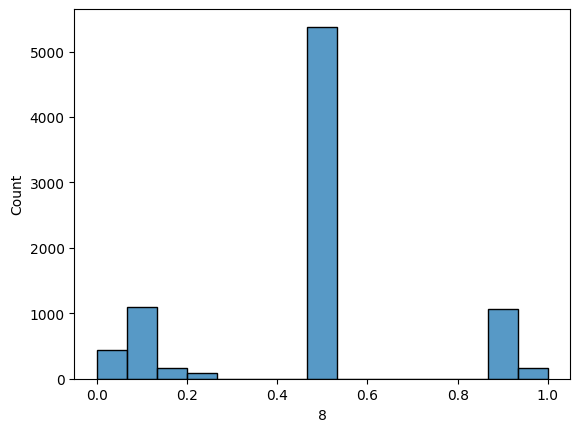

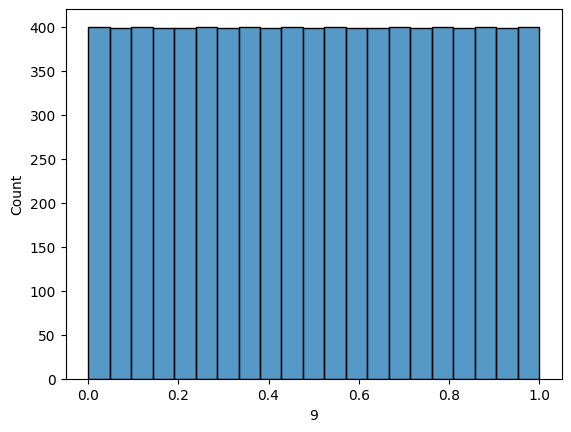

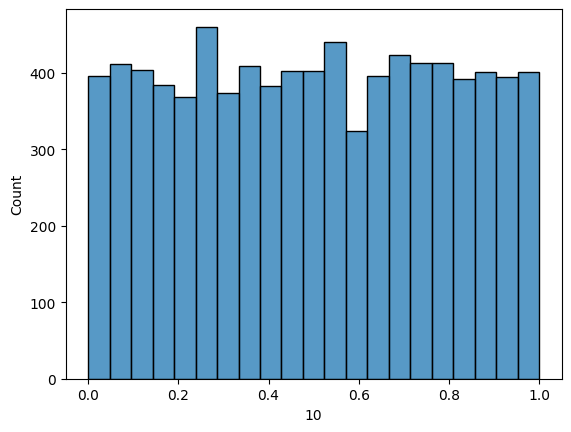

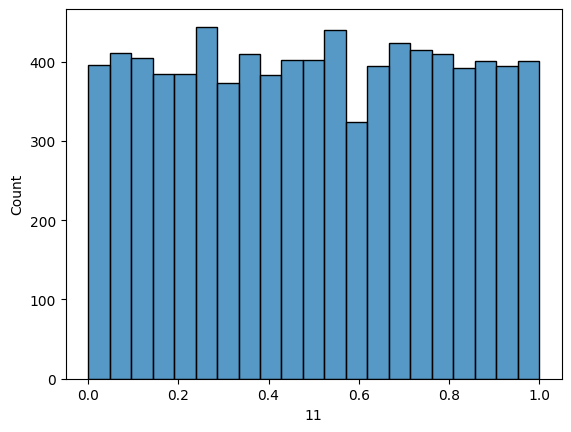

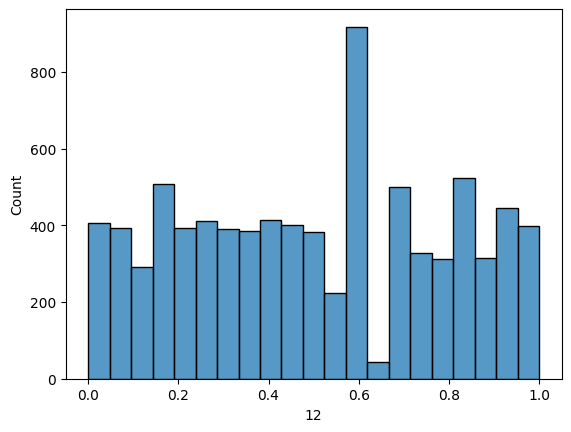

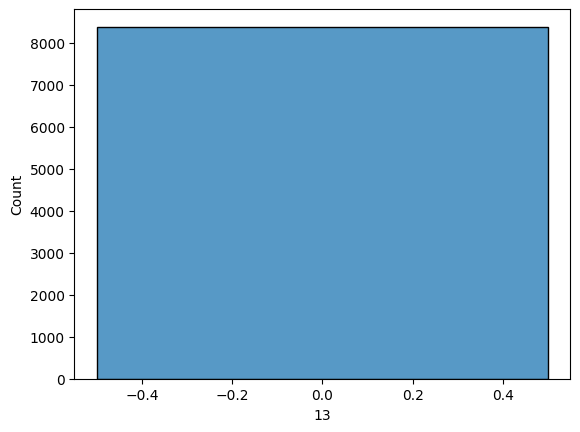

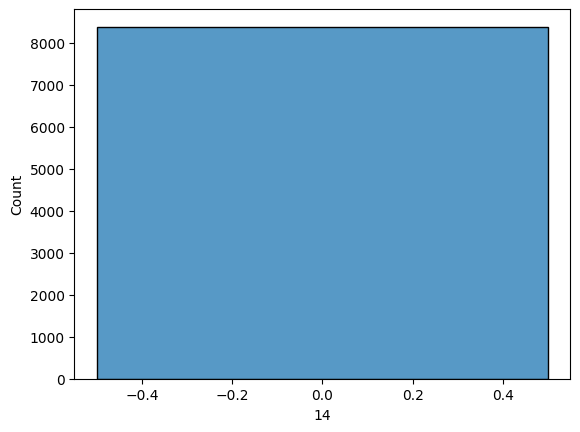

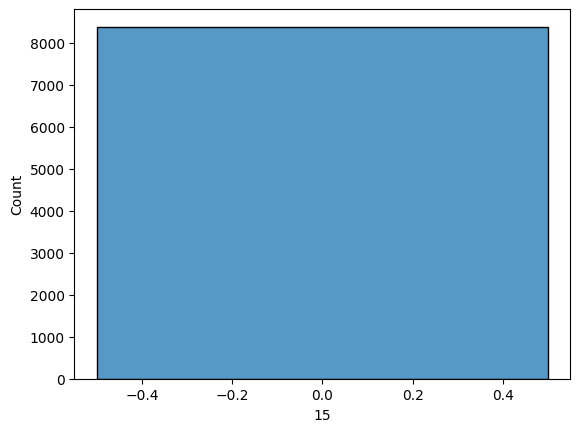

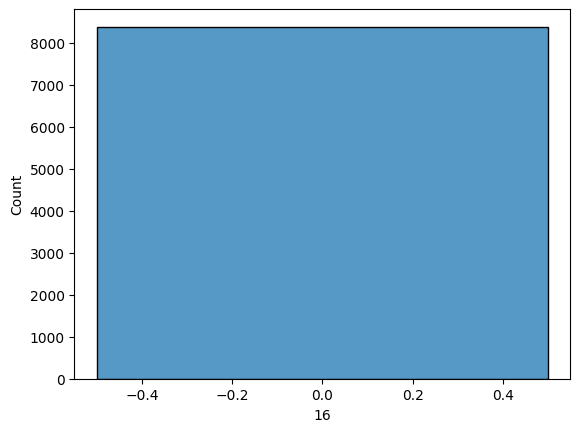

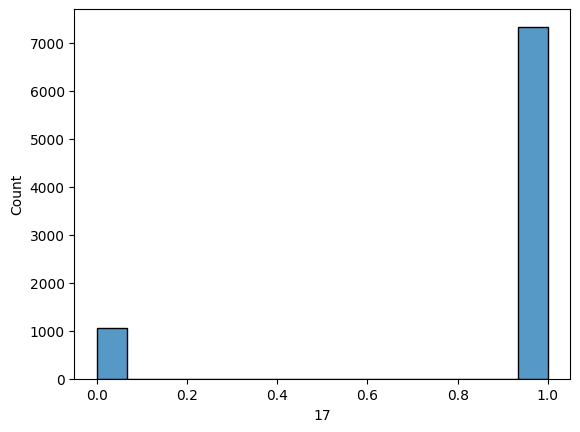

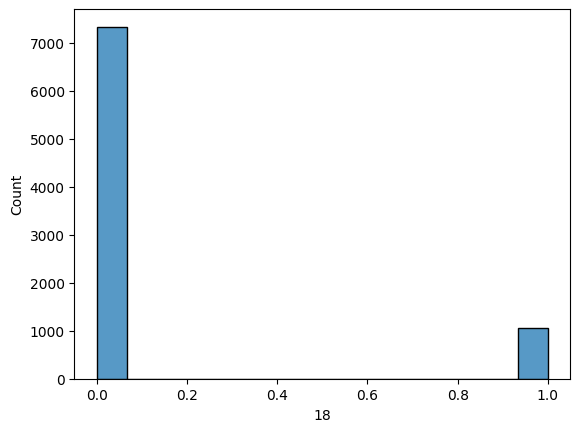

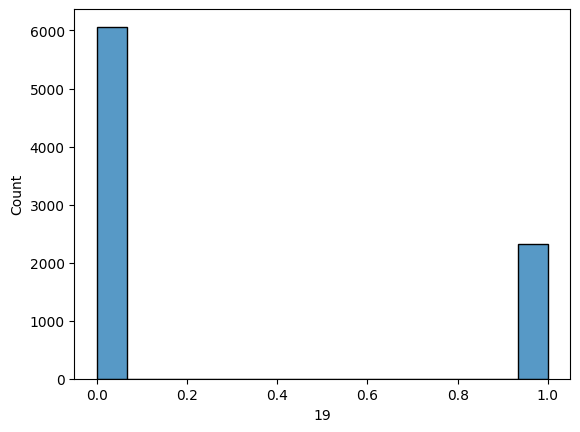

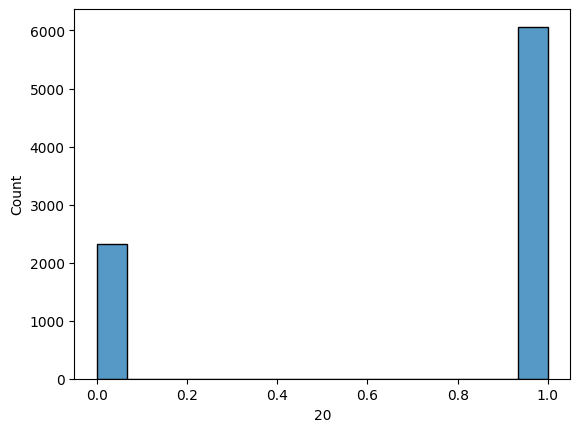

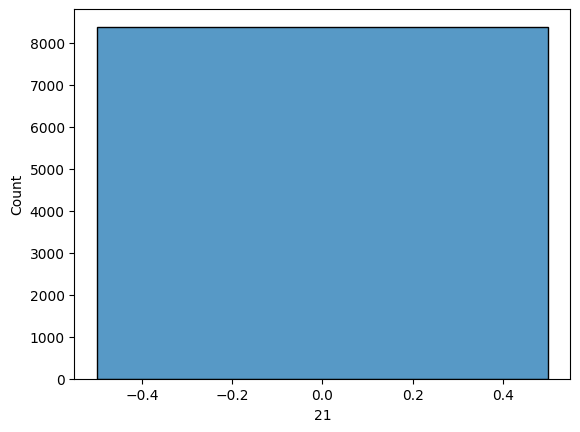

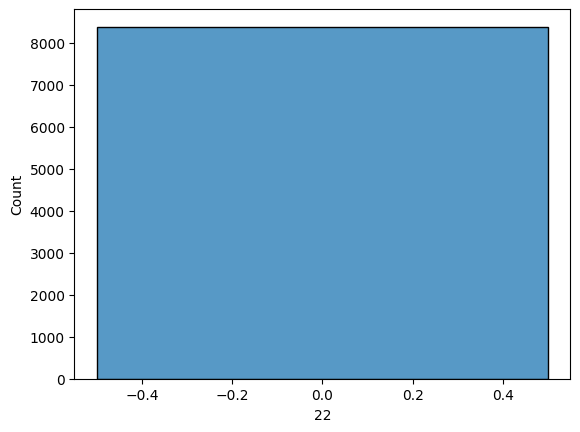

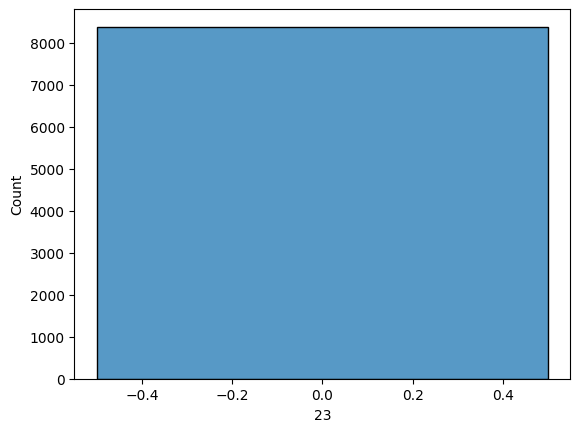

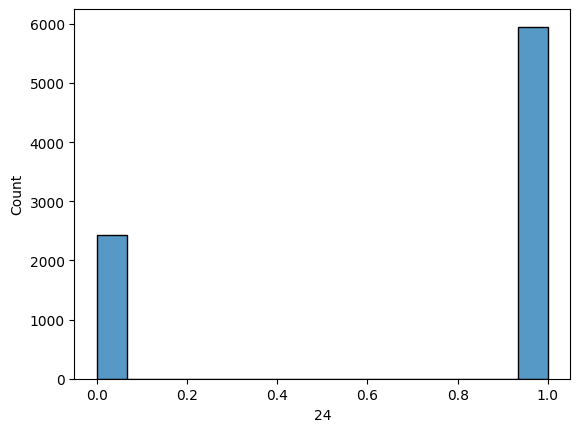

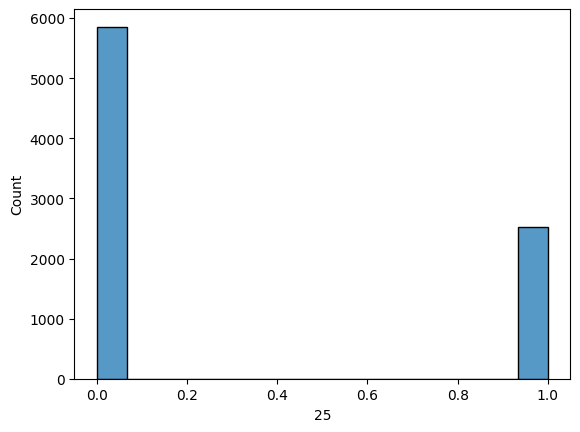

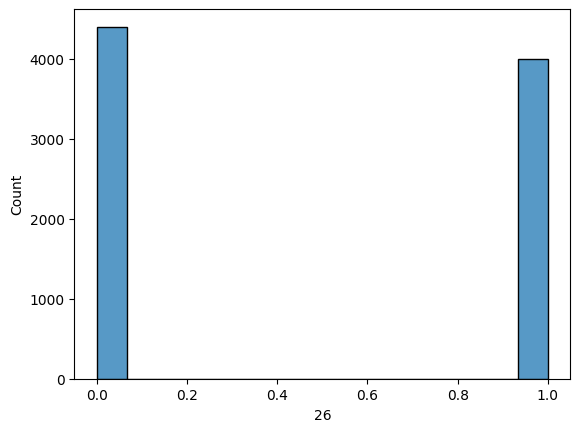

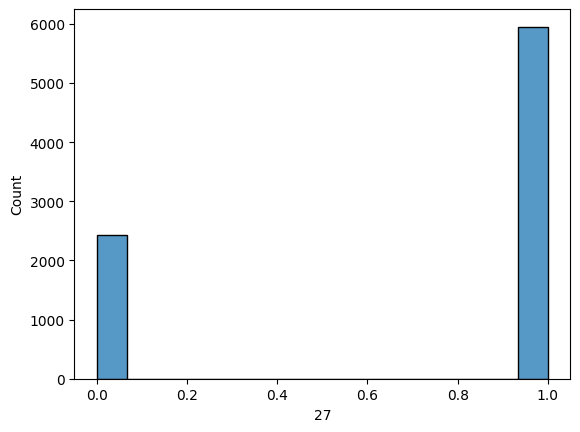

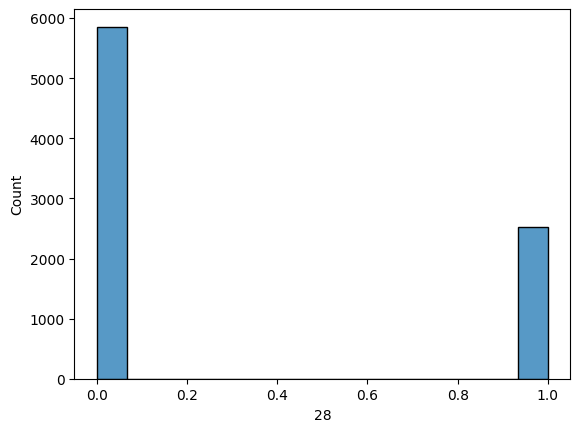

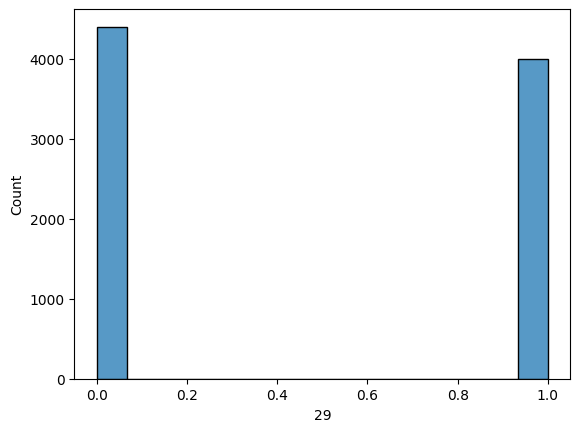

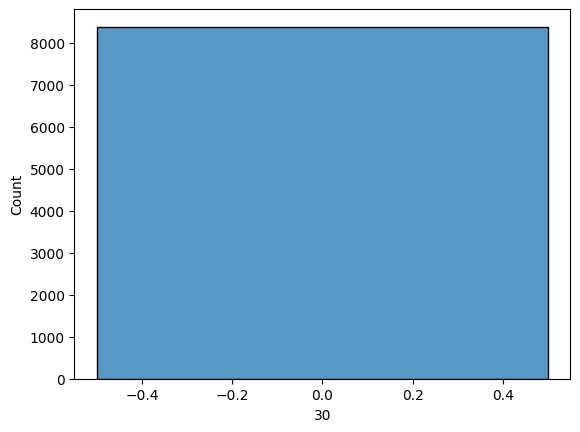

In [123]:
for i in transformed.columns:
    sns.histplot(data=transformed, x = i)
    plt.show()

# skewness after applying transformtion 

In [124]:
transformed.skew()

0     0.000023
1     0.000000
2     0.001232
3     0.000824
4     0.188499
5    -0.180007
6    -0.108776
7    -0.000038
8    -0.142399
9    -0.000011
10   -0.000116
11   -0.000178
12   -0.001866
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17   -2.265517
18    2.265517
19    0.997588
20   -0.997588
21    0.000000
22    0.000000
23    0.000000
24   -0.923356
25    0.863819
26    0.097187
27   -0.923356
28    0.863819
29    0.097187
30    0.000000
dtype: float64

# problem of skew is close to be solved but still problem of skewness exists in dataset need to be solved 

# Kurtosis 

In [125]:
transformed.kurtosis()

0    -1.199974
1     0.000000
2    -1.202664
3    -1.201700
4    -1.748143
5    -1.253449
6    -1.113103
7    -1.200040
8    -0.134418
9    -1.199993
10   -1.200140
11   -1.200171
12   -1.197238
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    3.133312
18    3.133312
19   -1.005059
20   -1.005059
21    0.000000
22    0.000000
23    0.000000
24   -1.147687
25   -1.254116
26   -1.991030
27   -1.147687
28   -1.254116
29   -1.991030
30    0.000000
dtype: float64

# in 2 columns, extreme value(Outliers) exist
# If the kurtosis value is between -2 and +2, the distribution can be considered approximately close to normal

# multicollinarity check 

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
vif = pd.DataFrame()
vif["Variable"] = transformed.columns
vif["VIF"] = [variance_inflation_factor(transformed.values, i) for i in range(transformed.shape[1])]

C:\Users\ravin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\ravin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [128]:
vif

Variable           VIF
0          0  1.830495e+00
1          1           NaN
2          2  1.268706e+00
3          3  1.222736e+00
4          4  1.726987e+00
5          5  1.109112e+01
6          6  6.743210e+00
7          7  1.009415e+00
8          8  1.428281e+00
9          9  1.067311e+00
10        10  9.772507e+04
11        11  9.774126e+04
12        12  1.036608e+00
13        13           NaN
14        14           NaN
15        15           NaN
16        16           NaN
17        17           inf
18        18           inf
19        19           inf
20        20           inf
21        21           NaN
22        22           NaN
23        23           NaN
24        24           inf
25        25           inf
26        26           inf
27        27           inf
28        28           inf
29        29           inf
30        30           NaN

In [129]:
# Variables 10, 11, 24, 25, 26, 27, 28, and 29 have extremely high VIF values.
# 1, 5, and 6, this suggests potential perfect correlation with other variables

In [130]:
matrix = transformed.corr()


In [131]:
for i in range(len(matrix)):
    for a in range(i):
        if abs(matrix.iloc[i, a]) > 0.70:
            
            print(i)
        

6
11
18
20
24
25
27
27
27
28
28
28
29


In [132]:
selected = transformed.drop([6,11,18,20,24,25,27,28,29], axis=1)

<Axes: >

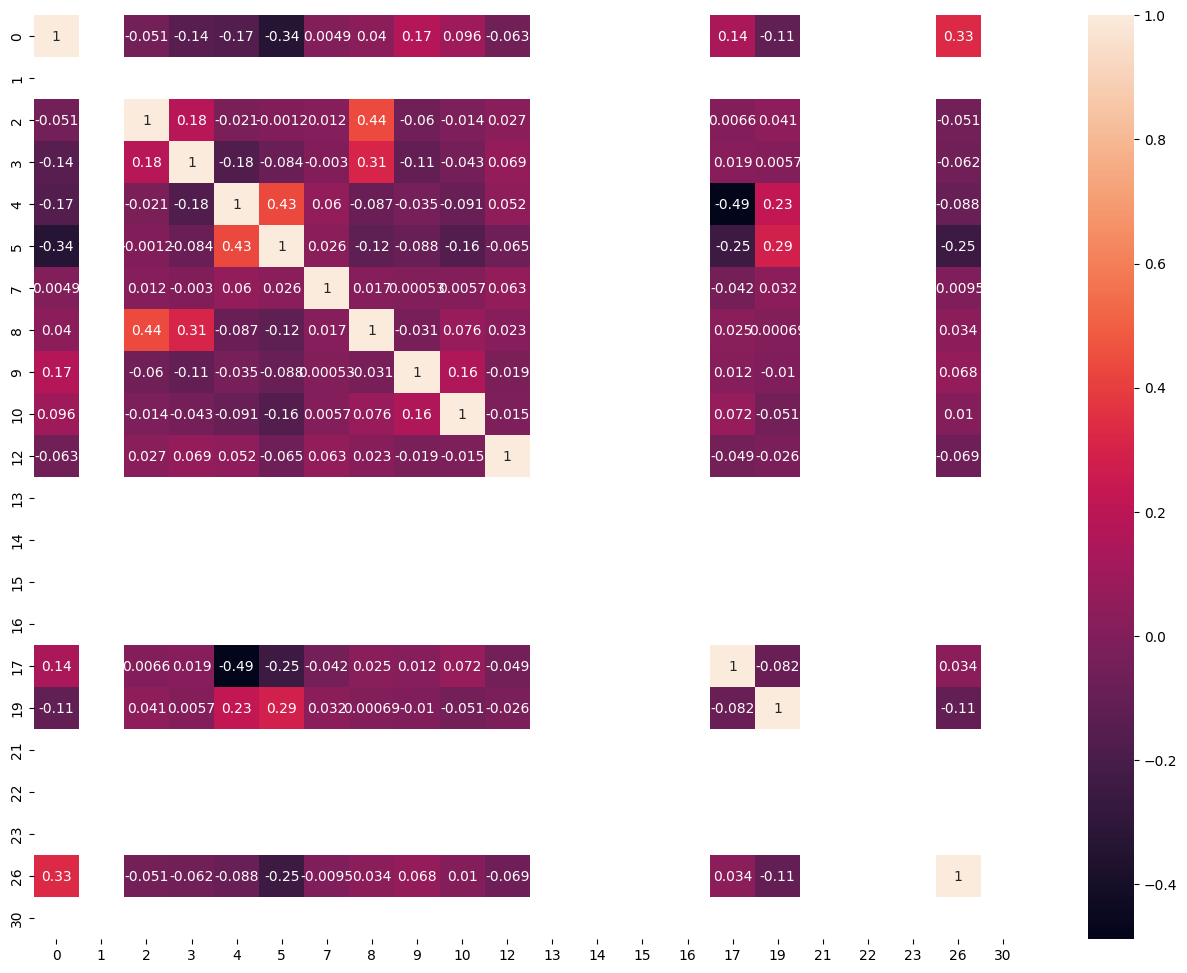

In [133]:
matrix1 = selected.corr()
plt.figure(figsize=(16,12))
sns.heatmap(matrix1, annot=True)

In [134]:
for i in range(len(matrix1)):
    for a in range(i):
        if abs(matrix1.iloc[i, a]) > 0.70:
            
            print(i)

# VIF 

In [135]:
Vif = pd.DataFrame()
Vif["Variable"] = selected.columns
Vif["VIF"] = [variance_inflation_factor(selected.values, i) for i in range(selected.shape[1])]
Vif

C:\Users\ravin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Variable       VIF
0          0  4.704437
1          1       NaN
2          2  4.937853
3          3  4.319124
4          4  2.762915
5          5  3.783351
6          7  3.833949
7          8  6.868730
8          9  3.988510
9         10  3.980658
10        12  3.792809
11        13       NaN
12        14       NaN
13        15       NaN
14        16       NaN
15        17  7.294590
16        19  1.542796
17        21       NaN
18        22       NaN
19        23       NaN
20        26  2.151476
21        30       NaN

# StandardScaler

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
st = StandardScaler()

In [138]:
x_scaled = pd.DataFrame(st.fit_transform(selected))

In [139]:
x_scaled

0    1         2         3         4         5         6   \
0    -0.001729  0.0 -1.490659 -1.653520  1.362109  0.963486  0.005513   
1    -0.000644  0.0 -1.631663 -1.452922  1.362109  0.483228 -1.453672   
2    -0.001709  0.0 -1.489977 -1.655643  0.781951  0.483228 -1.569130   
3     0.001739  0.0 -1.491111 -1.653682  0.781951  0.125686 -0.705579   
4    -0.000983  0.0 -1.489419 -1.654516  0.781951  0.649879 -0.264230   
...        ...  ...       ...       ...       ...       ...       ...   
8382  0.022549  0.0  1.700366 -1.669487  0.781951  0.963486 -0.833488   
8383  0.023920  0.0 -1.631663 -1.452922  0.781951  1.098322 -0.116451   
8384  0.025915  0.0  1.697516 -1.671379  0.781951  1.548280  0.640250   
8385  0.022540  0.0  1.698849 -1.671019  1.623115  1.219523  1.616606   
8386  0.022539  0.0  1.697496 -1.671033  1.362109  1.572520 -0.575499   

            7         8         9   ...   12   13   14        15        16  \
0    -2.023754 -1.374607 -1.717498  ...  0.0  0.0  0.0  0.378299 -0.618751   
1    -2.023754  1.142079 -1.513313  ...  0.0  0.0  0.0  0.378299 -0.618751   
2    -2.023754  1.131668 -1.579438  ...  0.0  0.0  0.0  0.378299 -0.618751   
3    -2.023754 -0.785188 -1.579438  ...  0.0  0.0  0.0  0.378299 -0.618751   
4    -2.023754  0.205123 -1.579438  ...  0.0  0.0  0.0  0.378299 -0.618751   
...        ...       ...       ...  ...  ...  ...  ...       ...       ...   
8382  2.024540 -0.403646  0.505309  ...  0.0  0.0  0.0  0.378299 -0.618751   
8383  2.024540  0.942043  1.256096  ...  0.0  0.0  0.0  0.378299 -0.618751   
8384  2.024540  0.919411  1.256096  ...  0.0  0.0  0.0  0.378299 -0.618751   
8385  2.024540  1.620024  1.447985  ...  0.0  0.0  0.0  0.378299 -0.618751   
8386  2.024540 -1.676505  1.695242  ...  0.0  0.0  0.0  0.378299 -0.618751   

       17   18   19        20   21  
0     0.0  0.0  0.0  1.049764  0.0  
1     0.0  0.0  0.0 -0.952595  0.0  
2     0.0  0.0  0.0 -0.952595  0.0  
3     0.0  0.0  0.0 -0.952595  0.0  
4     0.0  0.0  0.0 -0.952595  0.0  
...   ...  ...  ...       ...  ...  
8382  0.0  0.0  0.0  1.049764  0.0  
8383  0.0  0.0  0.0  1.049764  0.0  
8384  0.0  0.0  0.0 -0.952595  0.0  
8385  0.0  0.0  0.0  1.049764  0.0  
8386  0.0  0.0  0.0 -0.952595  0.0  

[8387 rows x 22 columns]

# Model Building 

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [141]:
x_train, x_test, y_train, y_test = train_test_split(selected, y, test_size=0.25, random_state=42)

In [142]:
models = {'Linear' : LinearRegression(), 'SVR' : SVR(), 'DecisionTreeRegressor' : DecisionTreeRegressor(), 'RandomForestRegressor': RandomForestRegressor(), 'AdaBoostRegressor': AdaBoostRegressor(), 'GradientBoostingRegressor': GradientBoostingRegressor(), 'ElasticNet': ElasticNet(), 'Ridge': Ridge(), 'Lasso': Lasso()}

In [157]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,')
    print(model_name)
    print('accuracy_score', r2_score(y_train, y_pred_train)*100)
    print('accuracy_score', r2_score(y_test, y_pred_test)*100)
    print('..........................................')
    print('mean_squared_error', mean_squared_error(y_train, y_pred_train))
    print('mean_squared_error', mean_squared_error(y_test, y_pred_test))
    print('...............................................')
    print('..........................................')
    print('mean_absolute_error', mean_absolute_error(y_train, y_pred_train))
    print('mean_absolute_error', mean_absolute_error(y_test, y_pred_test))
    print('...............................................')
   

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Linear
accuracy_score 61.46924127002161
accuracy_score 58.74753325636082
..........................................
mean_squared_error 132365.4652898397
mean_squared_error 139190.08009818182
...............................................
..........................................
mean_absolute_error 202.21797352796094
mean_absolute_error 208.6400971022213
...............................................
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SVR
accuracy_score 30.472045065801755
accuracy_score 29.08479480732158
..........................................
mean_squared_error 238850.73662865083
mean_squared_error 239275.22085621452
...............................................
..........................................
mean_absolute_error 215.40657863787965
mean_absolute_error 212.85784250902967
...............................................
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DecisionTreeRegressor
accuracy_score 100.0

In [144]:
for model_name, model in models.items():
    train_scores = cross_val_score(model, x_train, y_train, cv=5)
    test_scores = cross_val_score(model, x_test, y_test, cv=5)
    print(model_name)
    print('Train Scores:', train_scores.mean())
    print('Test Scores:', test_scores.mean())

Linear
Train Scores: 0.6133408166937179
Test Scores: 0.586288851834947
SVR
Train Scores: 0.2674294448019038
Test Scores: 0.08501815209575707
DecisionTreeRegressor
Train Scores: 0.7392421836989567
Test Scores: 0.706148805751746
RandomForestRegressor
Train Scores: 0.8716945899885007
Test Scores: 0.8544657193521994
AdaBoostRegressor
Train Scores: 0.8343259215463613
Test Scores: 0.8323964064500394
GradientBoostingRegressor
Train Scores: 0.8707990335981661
Test Scores: 0.8586564350632557
ElasticNet
Train Scores: 0.3109634901204868
Test Scores: 0.29375491243412133
Ridge
Train Scores: 0.6133536151125322
Test Scores: 0.5863921772578293
Lasso
Train Scores: 0.6133813459252968
Test Scores: 0.5857933118254962


# Best Model

# Gradient Boosting model

In [ ]:
gd1 = GradientBoostingRegressor()

In [ ]:
max_train = 0.0
min_test = 0.0
random_state = 0.0
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=i)
    gd1.fit(x_train, y_train)
    y_predtrains = gd1.predict(x_train)
    y_predtests = gd1.predict(x_test)
    accuracy_score_train = r2_score(y_train, y_predtrains)
    accuracy_score_test = r2_score(y_test, y_predtests)
    if accuracy_score_train > max_train and accuracy_score_test > min_test:
        max_train = accuracy_score_train
        min_test = accuracy_score_test
        random_state = i

In [ ]:
max_train

In [219]:
min_test

0.9897869169413579

In [220]:
random_state

24

In [145]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(x_scaled, y, test_size=0.25, random_state= 24)

In [146]:
gd2 = GradientBoostingRegressor()

In [147]:
gd2.fit(x_train0, y_train0)
y_predtrains1 = gd2.predict(x_train0)
y_predtests1 = gd2.predict(x_test0)

In [148]:
accuracy_score_train1 = r2_score(y_train0, y_predtrains1)
accuracy_score_test1 = r2_score(y_test0, y_predtests1)
print('train', accuracy_score_train1, 'test', accuracy_score_test1)

train 0.9166417985207675 test 0.8728707664374885


In [158]:
print('mean_squared_error', mean_squared_error(y_train0, y_predtrains1))
print('mean_squared_error', mean_squared_error(y_test0, y_predtests1))
print('..........................................')
print('mean_absolute_error', mean_absolute_error(y_train0, y_predtrains1))
print('mean_absolute_error', mean_absolute_error(y_test0, y_predtests1))

   

mean_squared_error 29784.62012883438
mean_squared_error 37587.52370291887
..........................................
mean_absolute_error 107.27593862842723
mean_absolute_error 110.39487916095312


# Cross Validation Score

In [149]:
train_scores1 = cross_val_score(gd2, x_train0, y_train0, cv=5)
test_scores1 = cross_val_score(gd2, x_test0, y_test0, cv=5)

print('Train Scores:', train_scores1.mean(), 'Test Scores:', test_scores1.mean())


Train Scores: 0.8681082029131908 Test Scores: 0.8636358704253148


# Hyperparameter Tuning

In [82]:
gd3 = GradientBoostingRegressor()

In [83]:
param_grid = {
    
    'n_estimators': [100,200,250,500,400,450,600],
    'max_depth': [10,11,12,13,14,15,16,17,18],
}

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
rscv = RandomizedSearchCV(gd3, param_distributions = param_grid, cv=5)

In [86]:
rscv.fit(x_scaled, y)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18],
                                        'n_estimators': [100, 200, 250, 500,
                                                         400, 450, 600]})

In [87]:
best_params = rscv.best_params_
best_score = rscv.best_score_

In [88]:
print(best_params)

{'n_estimators': 450, 'max_depth': 13}


In [89]:
print(best_score)

0.8058107156158829


# After Applying Hyperparameter Tuning 

In [150]:
gd4 = GradientBoostingRegressor(n_estimators=250, max_depth=2)

In [151]:
gd4.fit(x_train0, y_train0)
y_predtrains5 = gd4.predict(x_train0)
y_predtests5 = gd4.predict(x_test0)

In [152]:
accuracy_score_train5 = r2_score(y_train0, y_predtrains5)
accuracy_score_test5 = r2_score(y_test0, y_predtests5)
print('train', accuracy_score_train5, 'test', accuracy_score_test5)

train 0.906796050189561 test 0.8614037066294655


In [159]:
print('mean_squared_error', mean_squared_error(y_train0, y_predtrains5))
print('mean_squared_error', mean_squared_error(y_test0, y_predtests5))
print('..........................................')
print('mean_absolute_error', mean_absolute_error(y_train0, y_predtrains5))
print('mean_absolute_error', mean_absolute_error(y_test0, y_predtests5))

mean_squared_error 33302.592790494426
mean_squared_error 40977.91921037637
..........................................
mean_absolute_error 109.8173132143308
mean_absolute_error 113.37715961418785


# cross_val_score

In [153]:
train_scores1 = cross_val_score(gd4, x_train0, y_train0, cv=5)
test_scores1 = cross_val_score(gd4, x_test0, y_test0, cv=5)

print('Train Scores:', train_scores1.mean(), 'Test Scores:', test_scores1.mean())


Train Scores: 0.8611077087348825 Test Scores: 0.8510255386677033


# residuals

In [154]:
residuals = y_predtrains5 - y_train0


C:\Users\ravin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Average Cost for two', ylabel='Density'>

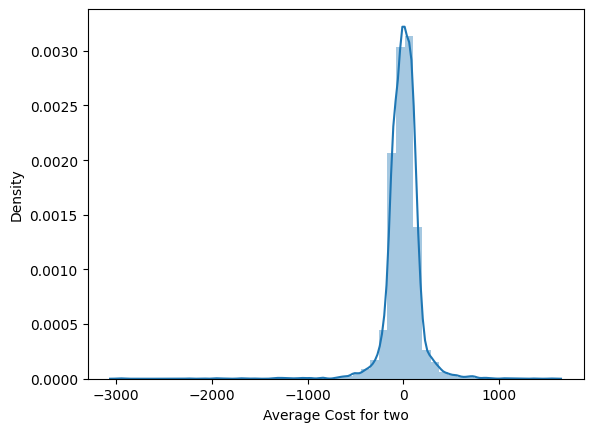

In [155]:
sns.distplot(residuals)

# Comments and Conclusion

# Price range prediction

In [160]:
df1 = df.reset_index()
df2 = df1.drop(['index'], axis=1)

In [161]:
x = df2.drop(['Price range'], axis=1)
y = df2['Price range']

In [243]:
food.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country', 'cuisines1'],
      dtype='object')

# Data Presentation

# Rating color vs Price range

<Axes: xlabel='Rating color'>

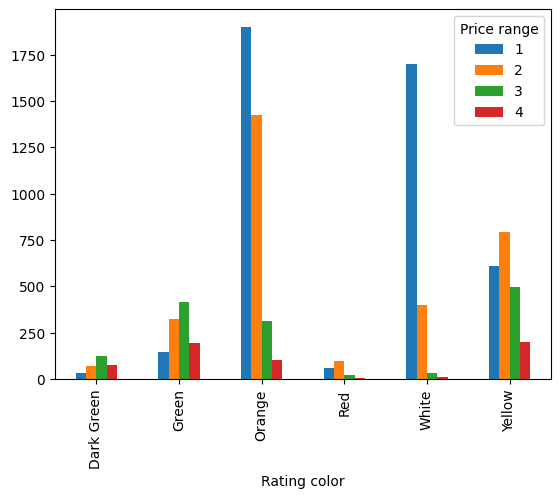

In [204]:
pd.crosstab(food['Rating color'], food['Price range']).plot(kind='bar')

In [202]:
pd.crosstab(food['Rating color'], food['Price range'])

Price range      1     2    3    4
Rating color                      
Dark Green      32    69  126   74
Green          144   325  416  194
Orange        1898  1425  313  101
Red             62    98   20    6
White         1700   402   35   11
Yellow         608   794  498  200

# Cuisines vs price range 

<Axes: xlabel='Has Online delivery'>

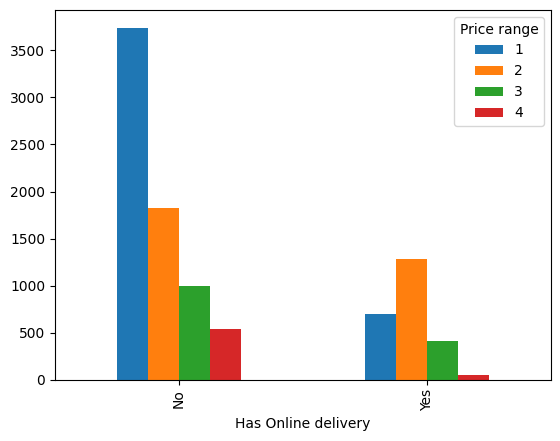

In [229]:
pd.crosstab(food['Has Online delivery'], food['Price range']).plot(kind='bar')

In [230]:
pd.crosstab(food['Has Online delivery'], food['Price range'])

Price range             1     2    3    4
Has Online delivery                      
No                   3743  1827  997  533
Yes                   701  1286  411   53

# Country vs price range 

<Axes: xlabel='Country'>

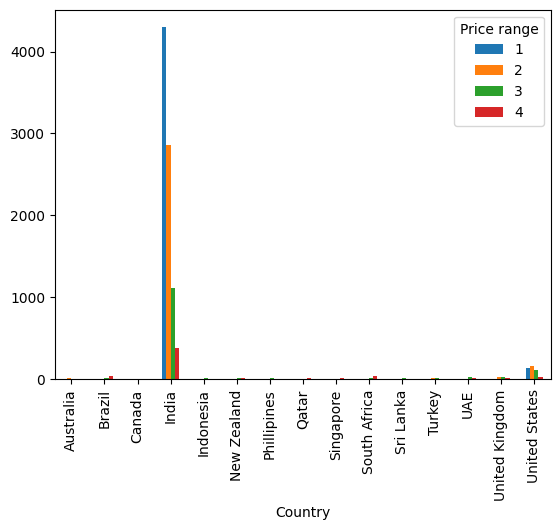

In [232]:
pd.crosstab(food['Country'], food['Price range']).plot(kind='bar')

# Rating text vs price range 

<Axes: xlabel='Rating text'>

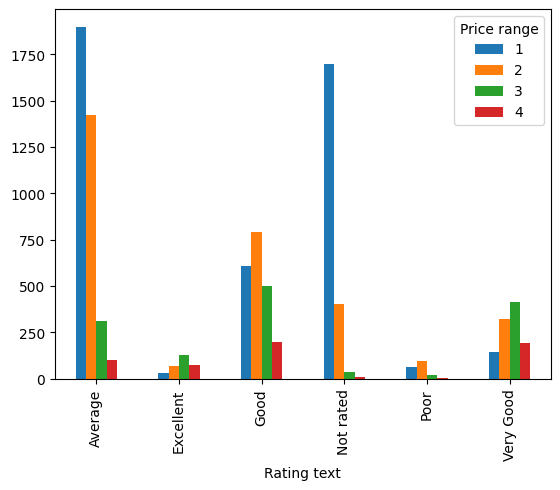

In [235]:
pd.crosstab(food['Rating text'], food['Price range']).plot(kind='bar')

In [236]:
pd.crosstab(food['Rating text'], food['Price range'])

Price range     1     2    3    4
Rating text                      
Average      1898  1425  313  101
Excellent      32    69  126   74
Good          608   794  498  200
Not rated    1700   402   35   11
Poor           62    98   20    6
Very Good     144   325  416  194

# Relationship between input and y

In [163]:
import seaborn as sns 

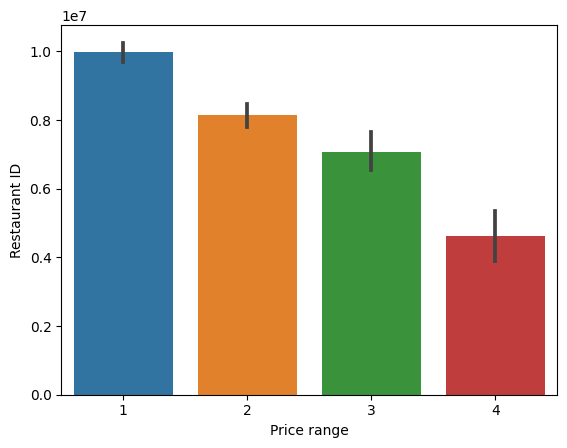

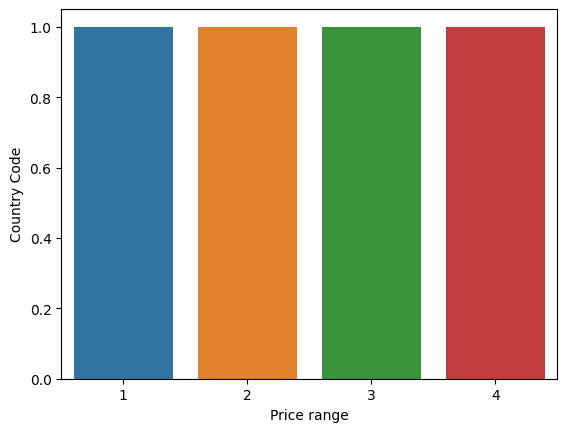

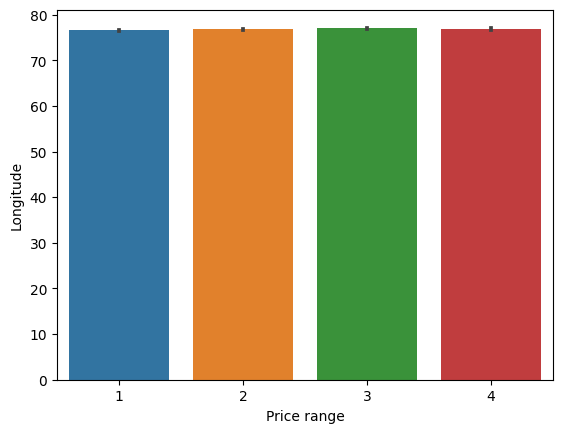

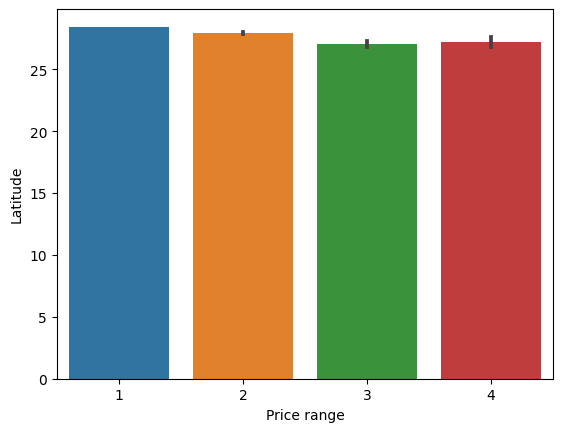

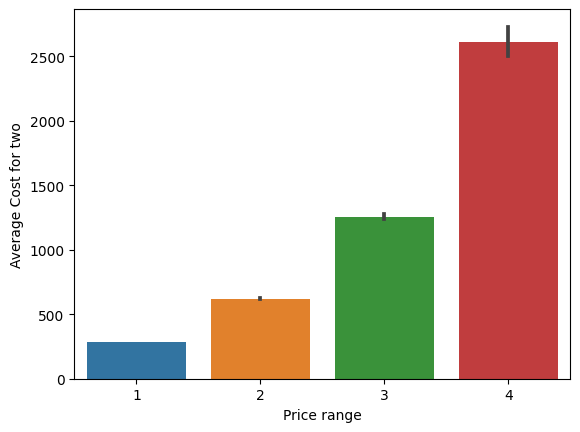

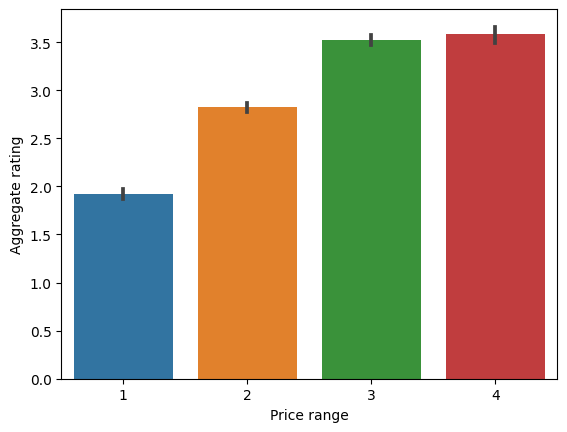

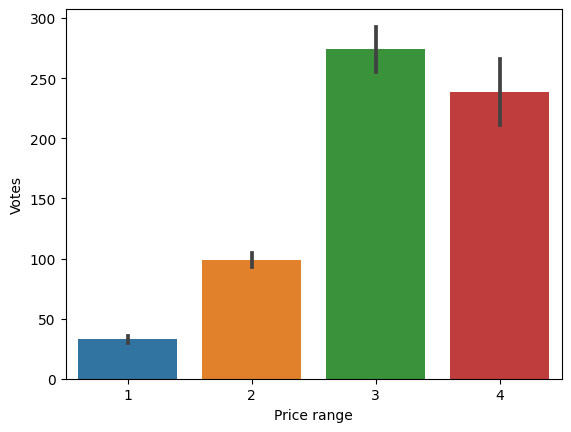

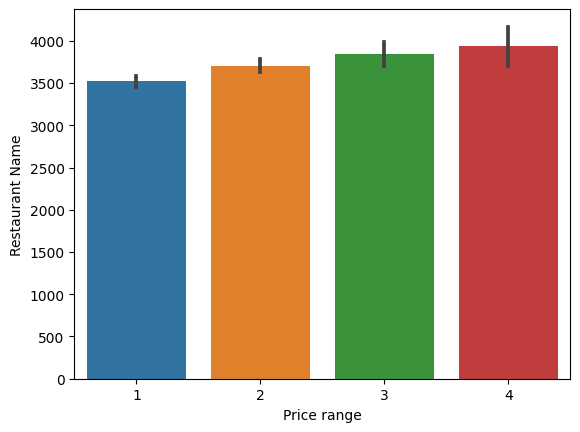

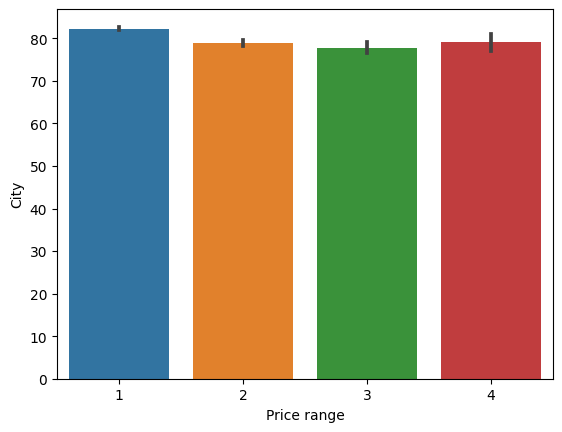

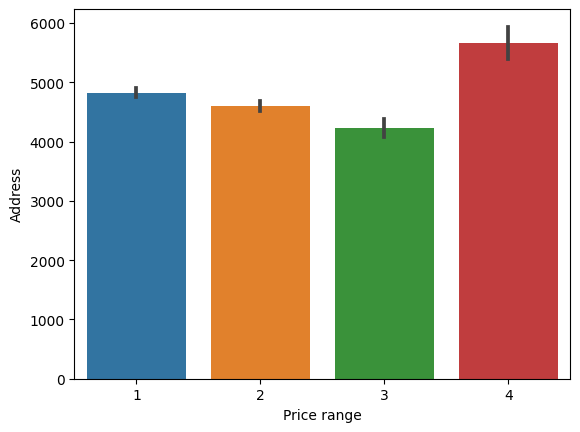

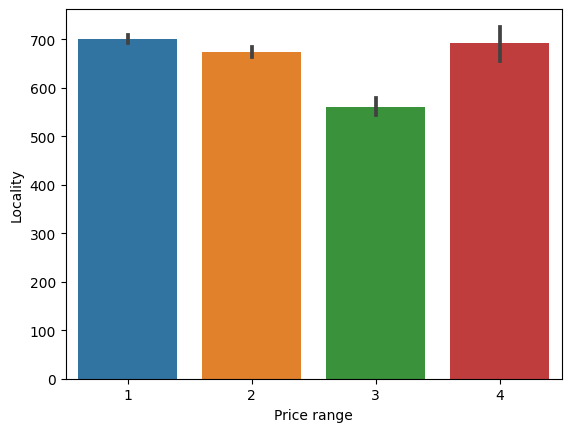

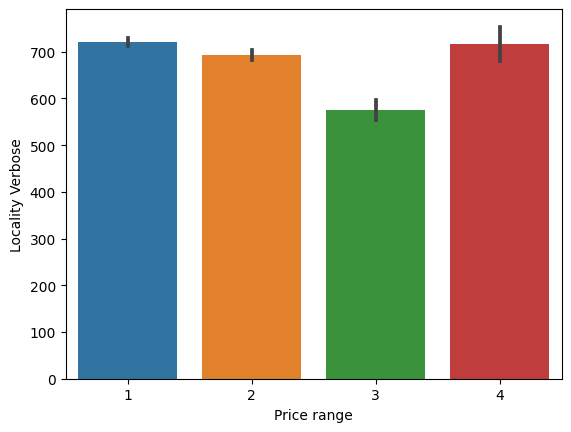

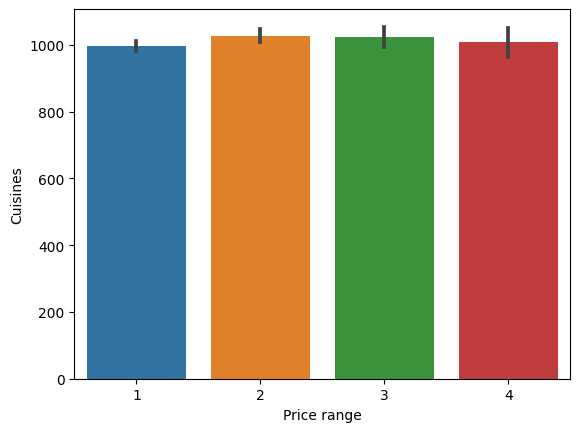

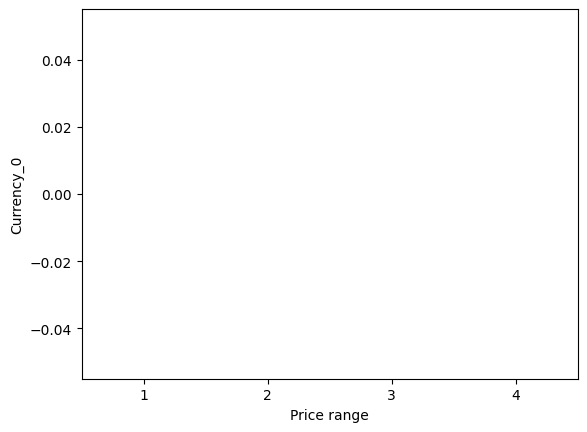

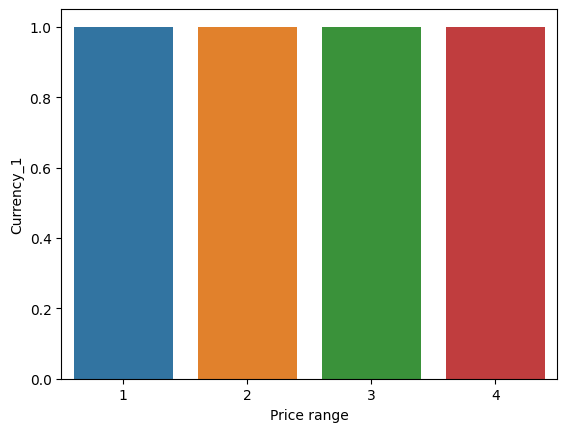

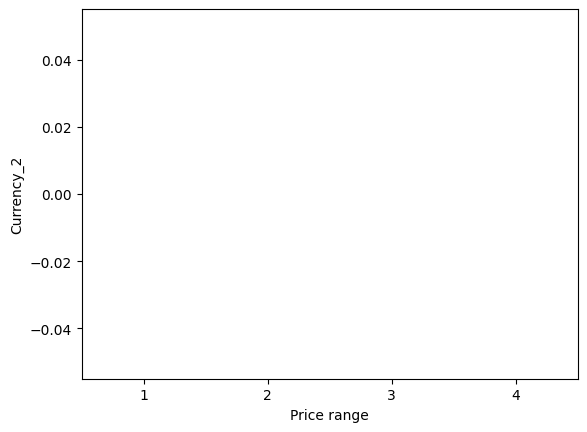

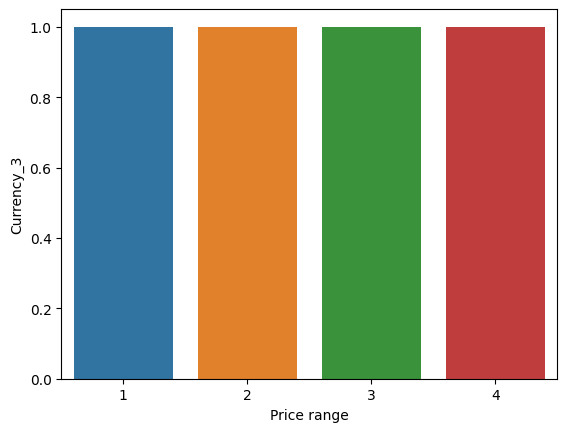

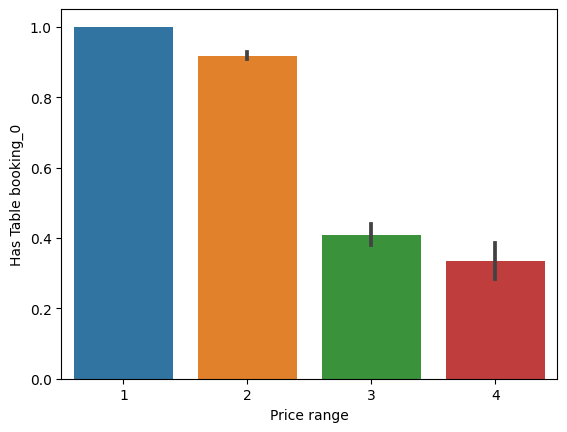

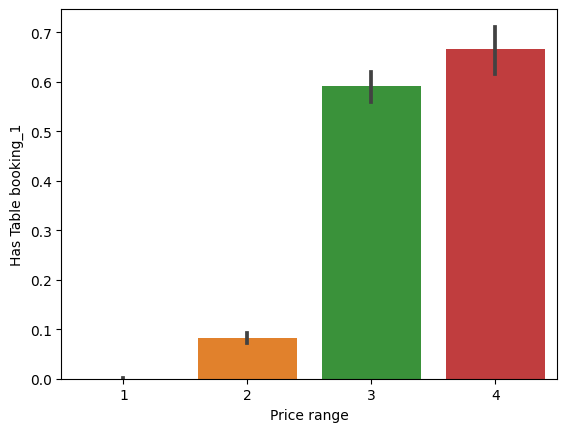

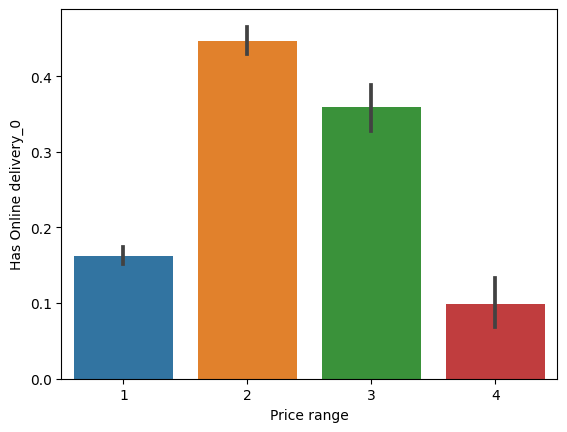

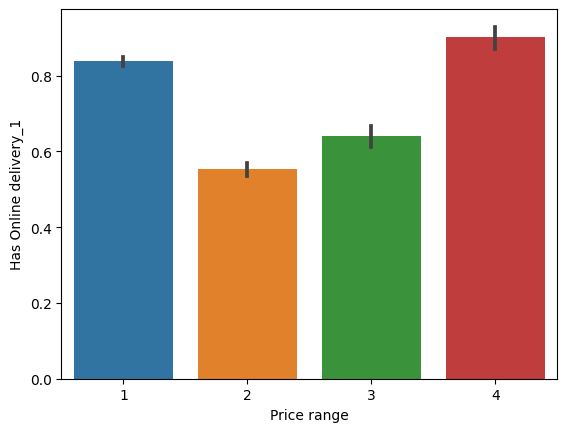

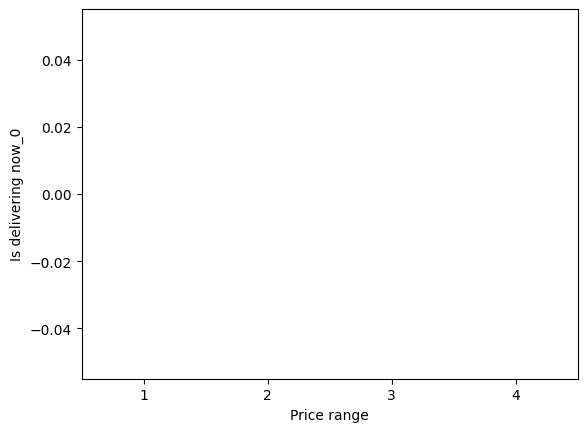

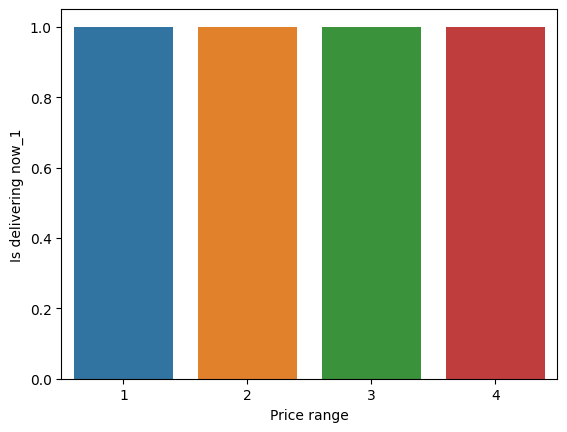

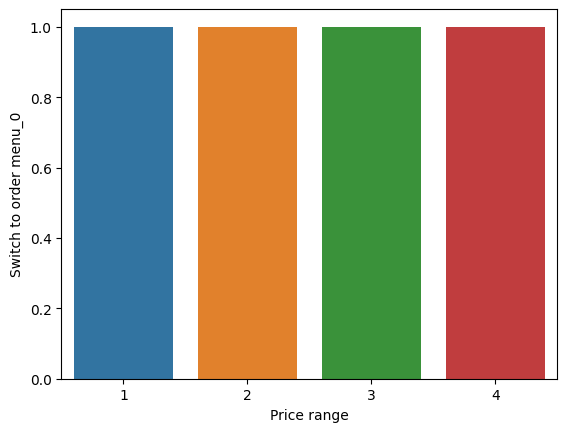

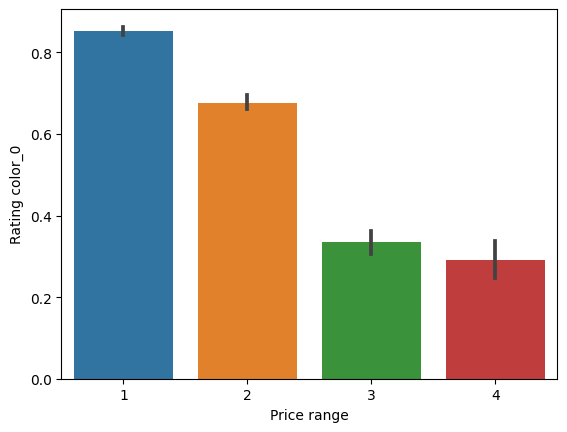

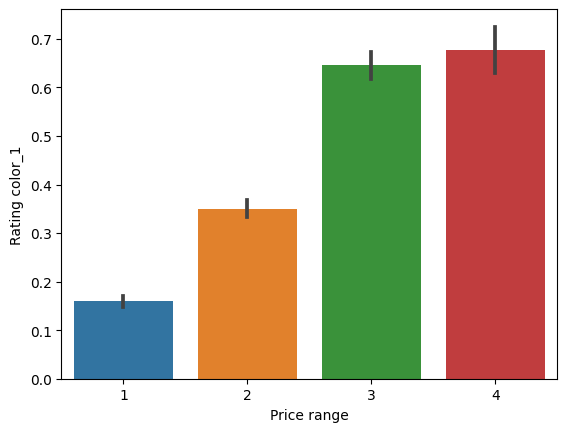

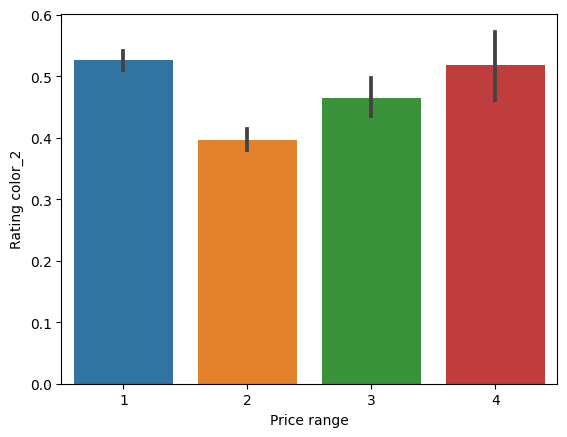

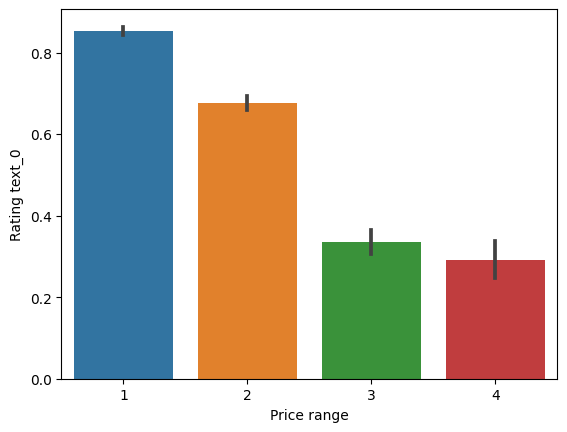

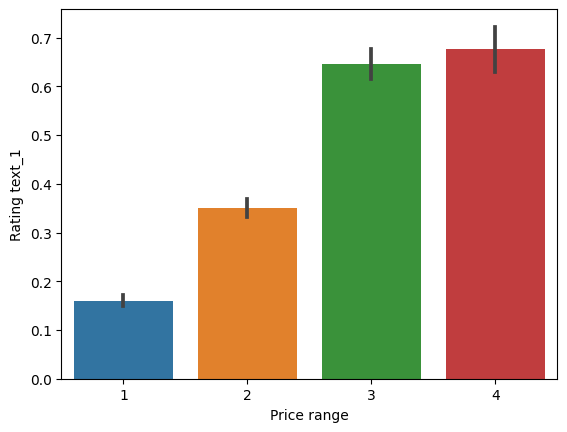

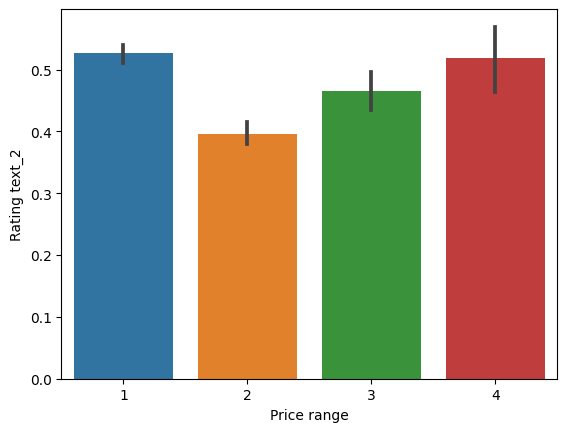

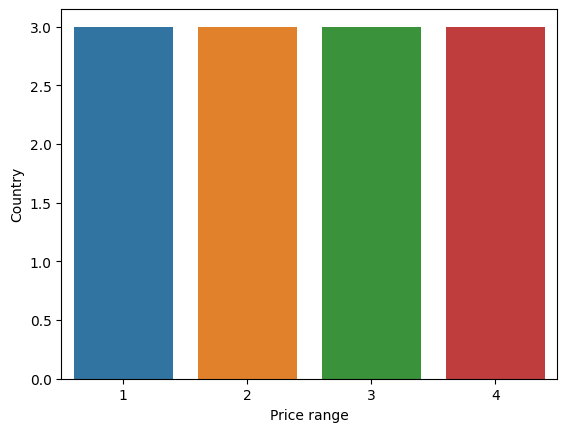

In [164]:
for i in x.columns:
    
    sns.barplot(data=x, y=i, x=y)
    plt.show()

# in some columns, there is no pattern in data 
# but in some cases, there is linear relationship and non linear relationship exist in input and output varible 

# Transformer

In [165]:
qt = QuantileTransformer(output_distribution='normal')

In [166]:
transformed = pd.DataFrame(qt.fit_transform(x))

In [167]:
transformed

0         1         2         3         4         5         6   \
0    -0.001255 -5.199338 -1.477807 -2.001430  0.877196  0.791884  1.244778   
1    -0.000469 -5.199338 -1.895259 -1.401177  0.963423  0.324254  0.487893   
2    -0.001241 -5.199338 -1.476336 -2.012950  0.461215  0.324254  0.475214   
3     0.001255 -5.199338 -1.478781 -2.002304  0.703922  0.022584 -0.067799   
4    -0.000715 -5.199338 -1.475139 -2.006801 -0.387078  0.473810  0.328223   
...        ...       ...       ...       ...       ...       ...       ...   
8382  0.016316 -5.199338  2.358209 -2.095495  0.461215  0.791884  1.113220   
8383  0.017308 -5.199338 -1.895259 -1.401177 -0.186756  0.955471  0.631785   
8384  0.018752 -5.199338  2.326187 -2.107955  0.461215  2.033104  1.039636   
8385  0.016308 -5.199338  2.340865 -2.105558  1.497997  1.128144  0.556927   
8386  0.016308 -5.199338  2.325970 -2.105649  1.394512  2.225823  1.426744   

            7         8         9   ...        21        22        23  \
0     0.003997 -5.199338 -1.263842  ... -5.199338 -5.199338 -5.199338   
1    -1.402950 -5.199338  0.953092  ... -5.199338 -5.199338 -5.199338   
2    -1.674849 -5.199338  0.941293  ... -5.199338 -5.199338 -5.199338   
3    -0.535083 -5.199338 -0.602825  ... -5.199338 -5.199338 -5.199338   
4    -0.192393 -5.199338  0.148998  ... -5.199338 -5.199338 -5.199338   
...        ...       ...       ...  ...       ...       ...       ...   
8382 -0.645295  5.199338 -0.296389  ... -5.199338 -5.199338 -5.199338   
8383 -0.084366  5.199338  0.745372  ... -5.199338 -5.199338 -5.199338   
8384  0.481300  5.199338  0.723919  ... -5.199338 -5.199338 -5.199338   
8385  1.834772  5.199338  1.848216  ... -5.199338 -5.199338 -5.199338   
8386 -0.429303  5.199338 -2.144837  ... -5.199338 -5.199338 -5.199338   

            24        25        26        27        28        29        30  
0    -5.199338  5.199338  5.199338 -5.199338  5.199338  5.199338 -5.199338  
1     5.199338 -5.199338 -5.199338  5.199338 -5.199338 -5.199338 -5.199338  
2     5.199338 -5.199338 -5.199338  5.199338 -5.199338 -5.199338 -5.199338  
3     5.199338 -5.199338 -5.199338  5.199338 -5.199338 -5.199338 -5.199338  
4     5.199338 -5.199338 -5.199338  5.199338 -5.199338 -5.199338 -5.199338  
...        ...       ...       ...       ...       ...       ...       ...  
8382 -5.199338  5.199338  5.199338 -5.199338  5.199338  5.199338 -5.199338  
8383 -5.199338  5.199338  5.199338 -5.199338  5.199338  5.199338 -5.199338  
8384 -5.199338  5.199338 -5.199338 -5.199338  5.199338 -5.199338 -5.199338  
8385 -5.199338  5.199338  5.199338 -5.199338  5.199338  5.199338 -5.199338  
8386 -5.199338  5.199338 -5.199338 -5.199338  5.199338 -5.199338 -5.199338  

[8387 rows x 31 columns]

# Skewness check

In [168]:
transformed.skew()

0     0.006762
1     0.000000
2     0.106781
3    -0.001613
4    -0.002790
5    -0.888953
6    -1.532840
7    -0.001933
8    -0.080456
9     0.008815
10   -0.001924
11   -0.002089
12   -0.036311
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17   -2.265517
18    2.265517
19    0.997588
20   -0.997588
21    0.000000
22    0.000000
23    0.000000
24   -0.923356
25    0.863819
26    0.097187
27   -0.923356
28    0.863819
29    0.097187
30    0.000000
dtype: float64

# Kurtosis check

In [169]:
transformed.kurtosis()

0     0.156741
1     0.000000
2    -0.123574
3     0.097527
4     0.269759
5    -0.816539
6     1.474797
7     0.103783
8     4.333919
9     0.182667
10    0.207174
11    0.207160
12    0.286487
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    3.133312
18    3.133312
19   -1.005059
20   -1.005059
21    0.000000
22    0.000000
23    0.000000
24   -1.147687
25   -1.254116
26   -1.991030
27   -1.147687
28   -1.254116
29   -1.991030
30    0.000000
dtype: float64

# RobustScaler

In [170]:
from sklearn.preprocessing import RobustScaler

In [171]:
scaler = RobustScaler()

In [172]:
x_scaled = pd.DataFrame(scaler.fit_transform(transformed))

In [197]:
x_scaled

0    1         2         3         4         5         6   \
0    -0.000557  0.0 -1.094881 -1.483215  0.675184  0.131965  0.909921   
1     0.000026  0.0 -1.404174 -1.038389  0.740711  0.051748  0.360521   
2    -0.000546  0.0 -1.093791 -1.491752  0.359070  0.051748  0.351318   
3     0.001305  0.0 -1.095603 -1.483862  0.543509  0.000000 -0.042838   
4    -0.000156  0.0 -1.092904 -1.487195 -0.285570  0.077403  0.244622   
...        ...  ...       ...       ...       ...       ...       ...   
8382  0.012476  0.0  1.747248 -1.552923  0.359070  0.131965  0.814427   
8383  0.013212  0.0 -1.404174 -1.038389 -0.133340  0.160026  0.464968   
8384  0.014283  0.0  1.723523 -1.562157  0.359070  0.344882  0.761014   
8385  0.012471  0.0  1.734398 -1.560380  1.146947  0.189646  0.410630   
8386  0.012470  0.0  1.723363 -1.560448  1.068306  0.377941  1.042004   

            7         8         9   ...   21   22   23   24   25   26   27  \
0     0.002745 -5.280975 -0.936792  ...  0.0  0.0  0.0 -1.0  1.0  1.0 -1.0   
1    -1.041749 -5.280975  0.706494  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2    -1.243602 -5.280975  0.697748  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3    -0.397459 -5.280975 -0.446818  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4    -0.143051 -5.280975  0.110465  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
8382 -0.479279  5.117700 -0.219675  ...  0.0  0.0  0.0 -1.0  1.0  1.0 -1.0   
8383 -0.062854  5.117700  0.552523  ...  0.0  0.0  0.0 -1.0  1.0  1.0 -1.0   
8384  0.357087  5.117700  0.536621  ...  0.0  0.0  0.0 -1.0  1.0  0.0 -1.0   
8385  1.361883  5.117700  1.369998  ...  0.0  0.0  0.0 -1.0  1.0  1.0 -1.0   
8386 -0.318929  5.117700 -1.589823  ...  0.0  0.0  0.0 -1.0  1.0  0.0 -1.0   

       28   29   30  
0     1.0  1.0  0.0  
1     0.0  0.0  0.0  
2     0.0  0.0  0.0  
3     0.0  0.0  0.0  
4     0.0  0.0  0.0  
...   ...  ...  ...  
8382  1.0  1.0  0.0  
8383  1.0  1.0  0.0  
8384  1.0  0.0  0.0  
8385  1.0  1.0  0.0  
8386  1.0  0.0  0.0  

[8387 rows x 31 columns]

# multicollinearity problem

<Axes: >

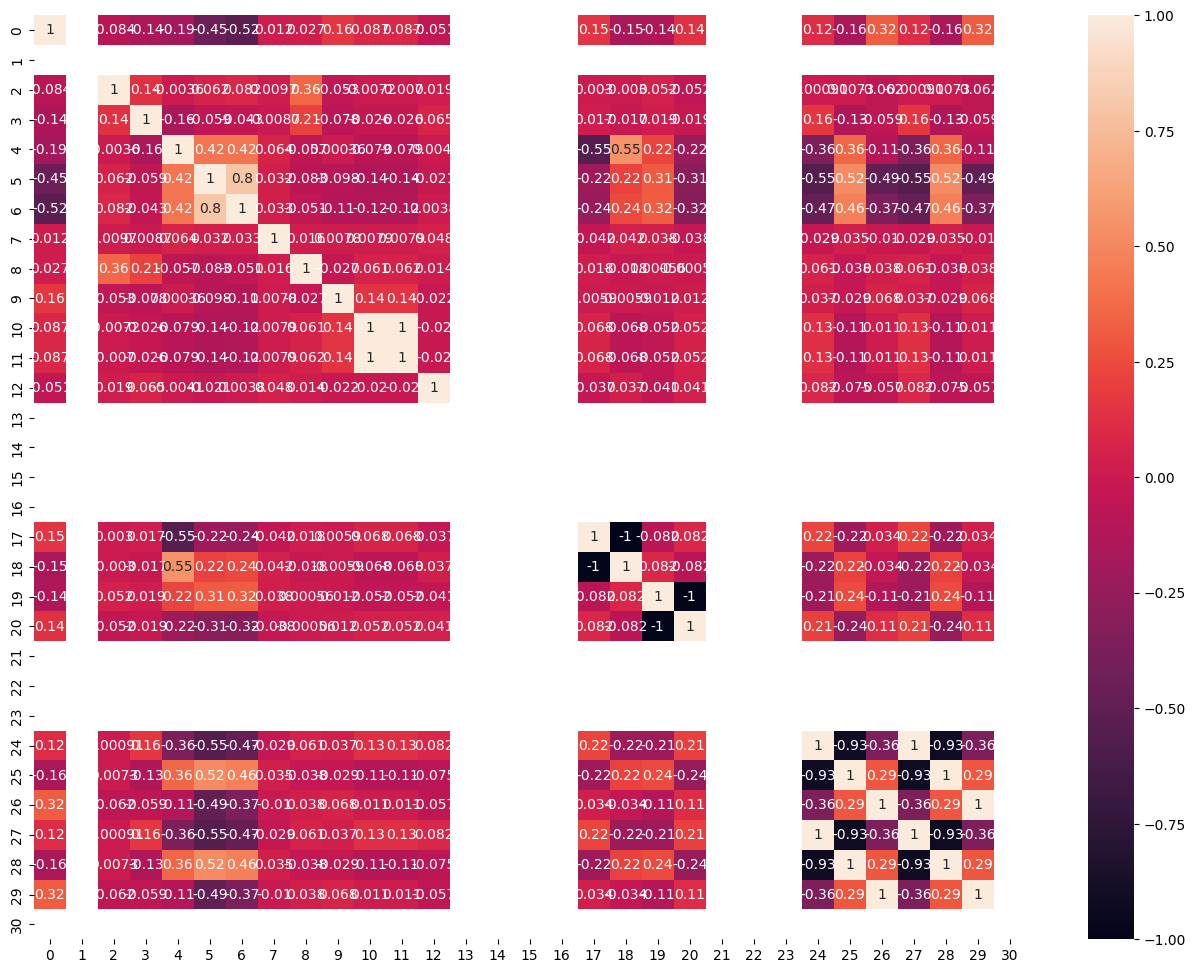

In [174]:
plt.figure(figsize=(16,12))
sns.heatmap(x_scaled.corr(), annot=True)

# Model Building 

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

In [176]:
x_train60, x_test60, y_train60, y_test60 = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

In [177]:
models = {
    'Logistic': LogisticRegression(multi_class='ovr'),
    'SVC': SVC(decision_function_shape='ovr'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

In [178]:
for model_name, model in models.items():
    model.fit(x_train60, y_train60)
    y_pred_train0 = model.predict(x_train60)
    y_pred_test0 = model.predict(x_test60)
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,')
    print(model_name)
    print('accuracy_score', accuracy_score(y_train60, y_pred_train0))
    print('accuracy_score', accuracy_score(y_test60, y_pred_test0))
    print('..........................................')
    print('confusion_matrix_train')
    print(confusion_matrix(y_train60, y_pred_train0))
    print('confusion_matrix on test')
    print(confusion_matrix(y_test60, y_pred_test0))
    print('..................................')
    print(classification_report(y_train60, y_pred_train0))
    print('...............................')

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Logistic
accuracy_score 0.8961844197138314
accuracy_score 0.8927038626609443
..........................................
confusion_matrix_train
[[3185   25    0    0]
 [  52 1872  151    0]
 [   0  307  422    4]
 [   0   56   58  158]]
confusion_matrix on test
[[1051    8    0    0]
 [  15  626   58    0]
 [   0  116  141    1]
 [   0   16   11   54]]
..................................
              precision    recall  f1-score   support

           1       0.98      0.99      0.99      3210
           2       0.83      0.90      0.86      2075
           3       0.67      0.58      0.62       733
           4       0.98      0.58      0.73       272

    accuracy                           0.90      6290
   macro avg       0.86      0.76      0.80      6290
weighted avg       0.90      0.90      0.89      6290

...............................
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SVC
accuracy_score 0.9220985691573926
accuracy_s

In [179]:
for model_name, model in models.items():
    train_scores = cross_val_score(model, x_train60, y_train60, cv=5)
    test_scores = cross_val_score(model, x_test60, y_test60, cv=5)
    print(model_name)
    print('Train Scores:', train_scores.mean())
    print('Test Scores:', test_scores.mean())

Logistic
Train Scores: 0.892845786963434
Test Scores: 0.8817547448573702
SVC
Train Scores: 0.9093799682034976
Test Scores: 0.8726832594613023
DecisionTreeClassifier
Train Scores: 0.9898251192368839
Test Scores: 0.9794942607114445
RandomForestClassifier
Train Scores: 0.9777424483306836
Test Scores: 0.9613819752244573
GaussianNB
Train Scores: 0.7112877583465819
Test Scores: 0.5870360268212297
AdaBoostClassifier
Train Scores: 0.4375198728139904
Test Scores: 0.4453960677349699
GradientBoostingClassifier
Train Scores: 0.9853736089030207
Test Scores: 0.9814035685873395


# Best Model 

In [180]:
 dt = DecisionTreeClassifier(max_depth=7)

In [181]:
dt.fit(x_train60, y_train60)
y_pred_train0 = dt.predict(x_train60)
y_pred_test0 = dt.predict(x_test60)
print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,')

print('accuracy_score', accuracy_score(y_train60, y_pred_train0))
print('accuracy_score', accuracy_score(y_test60, y_pred_test0))
print('..........................................')
print('confusion_matrix_train')
print(confusion_matrix(y_train60, y_pred_train0))
print('confusion_matrix on test')
print(confusion_matrix(y_test60, y_pred_test0))
print('..................................')
print(classification_report(y_train60, y_pred_train0))
print('.............................')

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
accuracy_score 0.9968203497615262
accuracy_score 0.9866475917978064
..........................................
confusion_matrix_train
[[3210    0    0    0]
 [   0 2074    1    0]
 [   0    5  718   10]
 [   0    0    4  268]]
confusion_matrix on test
[[1056    3    0    0]
 [   2  693    4    0]
 [   0    7  241   10]
 [   0    0    2   79]]
..................................
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3210
           2       1.00      1.00      1.00      2075
           3       0.99      0.98      0.99       733
           4       0.96      0.99      0.97       272

    accuracy                           1.00      6290
   macro avg       0.99      0.99      0.99      6290
weighted avg       1.00      1.00      1.00      6290

.............................


# Cross Validation score

In [182]:
train_scores = cross_val_score(dt, x_train60, y_train60, cv=5)
test_scores = cross_val_score(dt, x_test60, y_test60, cv=5)
print(model_name)
print('Train Scores:', train_scores.mean(), 'Test Scores:', test_scores.mean())


GradientBoostingClassifier
Train Scores: 0.9888712241653419 Test Scores: 0.9756767814524376


# hyperparameter tuning 

In [183]:
dt1 = DecisionTreeClassifier()

In [184]:
param_grid1 = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [185]:
from sklearn.model_selection import RandomizedSearchCV

In [186]:
rscv1 = RandomizedSearchCV(dt1, param_distributions = param_grid1, cv=5)

In [187]:
rscv1.fit(x_scaled, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8],
                                        'splitter': ['best', 'random']})

In [188]:
best_params = rscv1.best_params_
best_score = rscv1.best_score_

In [189]:
print(best_params)

{'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}


# After Applying Hyperparameter Tuning 

In [193]:
dt2 = DecisionTreeClassifier(splitter='best', min_samples_split=4, min_samples_leaf=4, max_features=None, max_depth=None, criterion='gini')

In [194]:
dt2.fit(x_train60, y_train60)
y_pred_train4 = dt2.predict(x_train60)
y_pred_test4 = dt2.predict(x_test60)
print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,')

print('accuracy_score', accuracy_score(y_train60, y_pred_train4))
print('accuracy_score', accuracy_score(y_test60, y_pred_test4))
print('..........................................')
print('confusion_matrix_train')
print(confusion_matrix(y_train60, y_pred_train4))
print('confusion_matrix on test')
print(confusion_matrix(y_test60, y_pred_test4))
print('..................................')
print(classification_report(y_train60, y_pred_train4))
print('.............................')

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
accuracy_score 0.9950715421303656
accuracy_score 0.9923700524558894
..........................................
confusion_matrix_train
[[3209    1    0    0]
 [   7 2065    3    0]
 [   0    9  723    1]
 [   0    0   10  262]]
confusion_matrix on test
[[1058    1    0    0]
 [   2  694    3    0]
 [   0    7  250    1]
 [   0    0    2   79]]
..................................
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3210
           2       1.00      1.00      1.00      2075
           3       0.98      0.99      0.98       733
           4       1.00      0.96      0.98       272

    accuracy                           1.00      6290
   macro avg       0.99      0.99      0.99      6290
weighted avg       1.00      1.00      1.00      6290

.............................


# Cross Validation

In [195]:
train_scores = cross_val_score(dt2, x_train60, y_train60, cv=5)
test_scores = cross_val_score(dt2, x_test60, y_test60, cv=5)

print('Train Scores:', train_scores.mean(), 'Test Scores:', test_scores.mean())


Train Scores: 0.9895071542130365 Test Scores: 0.9780622798045233


# Comments and Conclusion